# Cell 1: Environment Setup & Initial Data Exploration

In [1]:
# Cell 1: Environment Setup & Initial Data Exploration
import os
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Define base path (adjust if needed for Kaggle)
BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

# Check directory structure
print("=" * 60)
print("DIRECTORY STRUCTURE EXPLORATION")
print("=" * 60)

def explore_directory(path, indent=0):
    """Recursively explore directory structure (limited depth)"""
    items = []
    try:
        for item in sorted(os.listdir(path))[:10]:  # Limit to first 10 items
            item_path = os.path.join(path, item)
            if os.path.isdir(item_path):
                items.append(f"{'  ' * indent}📁 {item}/")
                if indent < 2:  # Limit depth
                    items.extend(explore_directory(item_path, indent + 1))
            else:
                size = os.path.getsize(item_path)
                items.append(f"{'  ' * indent}📄 {item} ({size/1024:.1f} KB)")
        
        total_items = len(os.listdir(path))
        if total_items > 10:
            items.append(f"{'  ' * indent}... and {total_items - 10} more items")
    except Exception as e:
        items.append(f"{'  ' * indent}Error: {e}")
    return items

# Explore main directory
print("\n📂 Main Directory Structure:")
for line in explore_directory(BASE_PATH):
    print(line)

# Check CSV files
print("\n" + "=" * 60)
print("CSV FILES EXPLORATION")
print("=" * 60)

# Load test.csv
test_csv_path = os.path.join(BASE_PATH, 'test.csv')
if os.path.exists(test_csv_path):
    test_df = pd.read_csv(test_csv_path)
    print(f"\n📄 test.csv:")
    print(f"   Shape: {test_df.shape}")
    print(f"   Columns: {test_df.columns.tolist()}")
    print(f"\n   First 5 rows:")
    print(test_df.head().to_string())
    print(f"\n   Data types:\n{test_df.dtypes}")

# Load sample_submission.csv
submission_path = os.path.join(BASE_PATH, 'sample_submission.csv')
if os.path.exists(submission_path):
    submission_df = pd.read_csv(submission_path)
    print(f"\n📄 sample_submission.csv:")
    print(f"   Shape: {submission_df.shape}")
    print(f"   Columns: {submission_df.columns.tolist()}")
    print(f"\n   First 5 rows:")
    print(submission_df.head().to_string())
    print(f"\n   Unique genres in sample: {submission_df['genre'].unique()}")

# Count files in key directories
print("\n" + "=" * 60)
print("FILE COUNTS")
print("=" * 60)

# Genres stems
genres_path = os.path.join(BASE_PATH, 'genres_stems')
if os.path.exists(genres_path):
    print(f"\n📁 genres_stems/:")
    genres = sorted(os.listdir(genres_path))
    print(f"   Genres found: {genres}")
    
    for genre in genres:
        genre_path = os.path.join(genres_path, genre)
        if os.path.isdir(genre_path):
            songs = os.listdir(genre_path)
            print(f"   {genre}: {len(songs)} songs")
            
            # Check first song's stems
            if songs:
                first_song_path = os.path.join(genre_path, songs[0])
                if os.path.isdir(first_song_path):
                    stems = os.listdir(first_song_path)
                    print(f"      └── Sample stems: {stems}")

# Mashups (test data)
mashups_path = os.path.join(BASE_PATH, 'mashups')
if os.path.exists(mashups_path):
    mashup_files = os.listdir(mashups_path)
    print(f"\n📁 mashups/: {len(mashup_files)} files")
    print(f"   Sample files: {sorted(mashup_files)[:5]}")

# ESC-50 noise data
esc_path = os.path.join(BASE_PATH, 'ESC-50-master')
if os.path.exists(esc_path):
    print(f"\n📁 ESC-50-master/:")
    for item in os.listdir(esc_path):
        item_path = os.path.join(esc_path, item)
        if os.path.isdir(item_path):
            print(f"   📁 {item}/: {len(os.listdir(item_path))} files")
        else:
            print(f"   📄 {item}")

print("\n" + "=" * 60)
print("EXPLORATION COMPLETE")
print("=" * 60)

DIRECTORY STRUCTURE EXPLORATION

📂 Main Directory Structure:
📁 ESC-50-master/
  📄 LICENSE (277.9 KB)
  📄 README.md (29.8 KB)
  📁 audio/
    📄 1-100032-A-0.wav (430.7 KB)
    📄 1-100038-A-14.wav (430.7 KB)
    📄 1-100210-A-36.wav (430.7 KB)
    📄 1-100210-B-36.wav (430.7 KB)
    📄 1-101296-A-19.wav (430.7 KB)
    📄 1-101296-B-19.wav (430.7 KB)
    📄 1-101336-A-30.wav (430.7 KB)
    📄 1-101404-A-34.wav (430.7 KB)
    📄 1-103298-A-9.wav (430.7 KB)
    📄 1-103995-A-30.wav (430.7 KB)
    ... and 1990 more items
  📁 meta/
    📄 esc50-human.xlsx (533.7 KB)
    📄 esc50.csv (91.5 KB)
📁 genres_stems/
  📁 blues/
    📁 blues.00000/
    📁 blues.00001/
    📁 blues.00002/
    📁 blues.00003/
    📁 blues.00004/
    📁 blues.00005/
    📁 blues.00006/
    📁 blues.00007/
    📁 blues.00008/
    📁 blues.00009/
    ... and 90 more items
  📁 classical/
    📁 classical.00000/
    📁 classical.00001/
    📁 classical.00002/
    📁 classical.00003/
    📁 classical.00004/
    📁 classical.00005/
    📁 classical.00006/

# Cell 2: Deep Audio Analysis

AUDIO PROPERTIES ANALYSIS

📊 TRAINING DATA (Genre Stems) Analysis:
--------------------------------------------------

Sampled 24 training stems:
  Sample rates: {44100}
  Durations: min=30.01s, max=30.08s
  Channels: {2}

Detailed breakdown:
  blues/blues.00000/drums.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00000/vocals.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00000/bass.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00000/other.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/drums.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/vocals.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/bass.wav: 30.01s, 44100Hz, 2ch
  blues/blues.00001/other.wav: 30.01s, 44100Hz, 2ch

📊 TEST DATA (Mashups) Analysis:
--------------------------------------------------

Sampling test mashups...
  song0001.wav: 30.00s, 22050Hz, 1ch
  song0002.wav: 22.34s, 22050Hz, 1ch
  song0101.wav: 29.86s, 22050Hz, 1ch
  song0501.wav: 30.01s, 22050Hz, 1ch
  song1001.wav: 19.27s, 22050Hz, 1ch
  song1501.wav: 30.00s, 22050Hz, 1ch
  song200

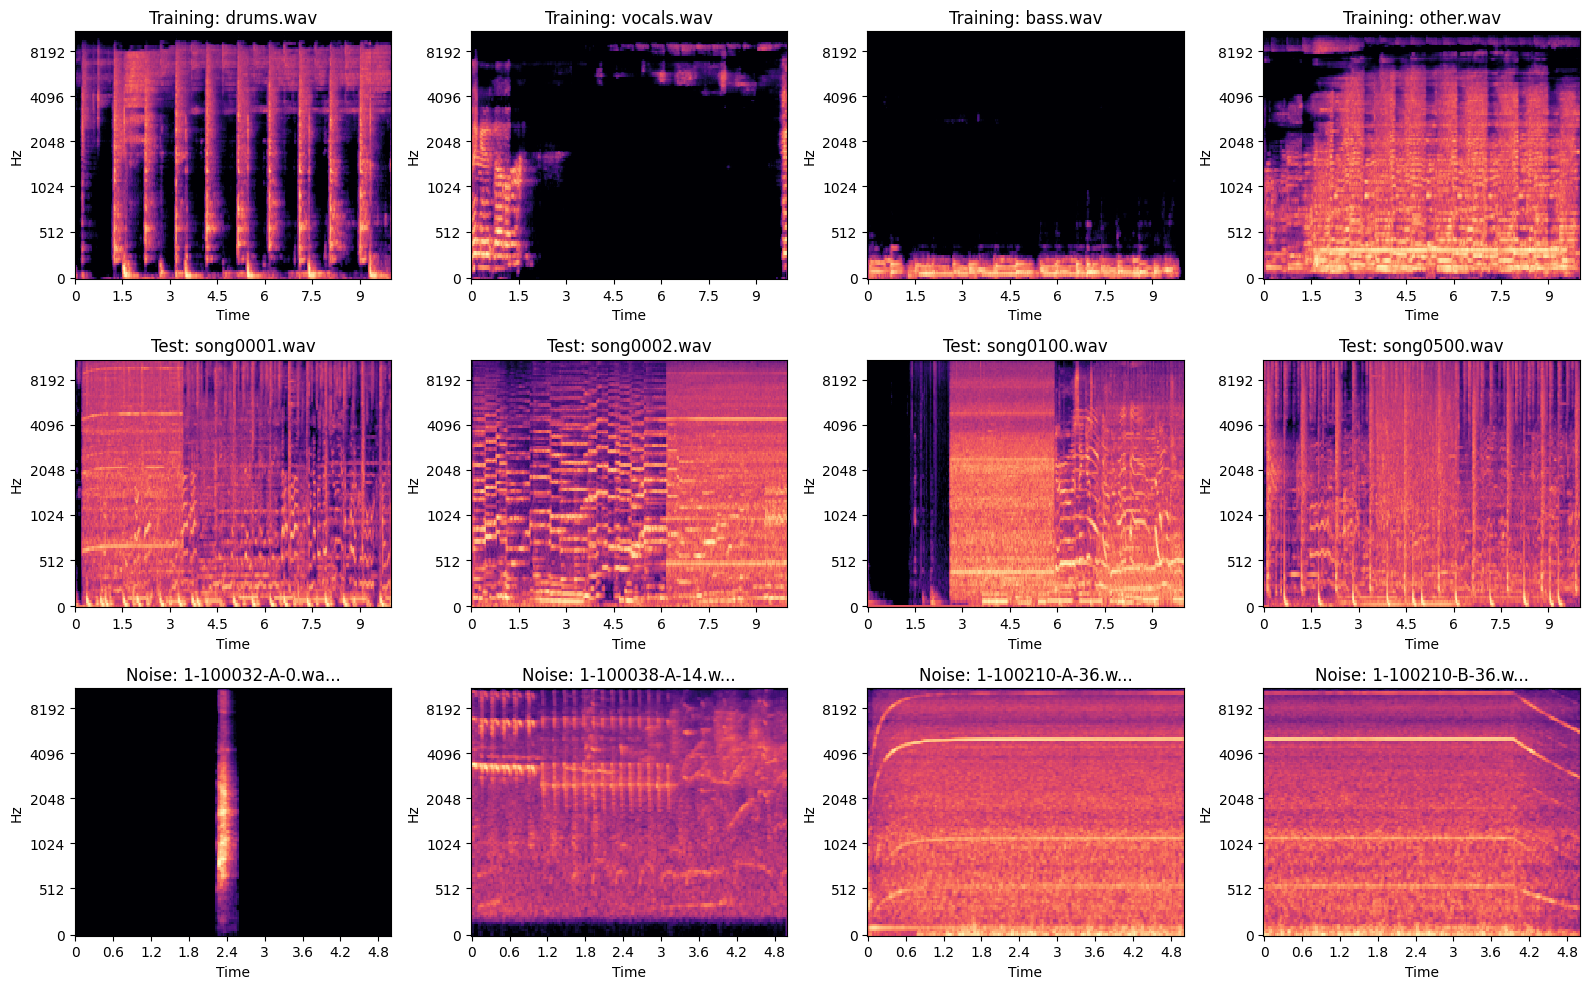


✅ Spectrogram visualization saved!

📊 AUDIO FEATURE COMPARISON
--------------------------------------------------

Comparing audio features between datasets...

Feature comparison (Training combined vs Test mashup):
Feature                            Training         Test      Ratio
------------------------------------------------------------------
rms_mean                             0.1244       0.1306       1.05
zcr_mean                             0.0801       0.1691       2.11
spectral_centroid_mean            1782.7412    3489.2452       1.96
mfcc_0_mean                       -125.2663     -93.7755       0.75
mfcc_1_mean                        120.2194      55.0205       0.46

AUDIO ANALYSIS COMPLETE


In [2]:
# Cell 2: Deep Audio Analysis
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import os

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("AUDIO PROPERTIES ANALYSIS")
print("=" * 60)

# Function to get audio info without loading full audio
def get_audio_info(file_path):
    """Get audio properties"""
    try:
        y, sr = librosa.load(file_path, sr=None, mono=False)
        duration = librosa.get_duration(y=y, sr=sr)
        if len(y.shape) == 1:
            channels = 1
        else:
            channels = y.shape[0]
        return {
            'sample_rate': sr,
            'duration': duration,
            'channels': channels,
            'samples': y.shape[-1]
        }
    except Exception as e:
        return {'error': str(e)}

# 1. Analyze TRAINING stems (sample from each genre)
print("\n📊 TRAINING DATA (Genre Stems) Analysis:")
print("-" * 50)

genres_path = os.path.join(BASE_PATH, 'genres_stems')
genres = sorted(os.listdir(genres_path))

stem_types = ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']
training_stats = defaultdict(list)

for genre in genres[:3]:  # Sample 3 genres for speed
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))[:2]  # First 2 songs per genre
    
    for song in songs:
        song_path = os.path.join(genre_path, song)
        for stem in stem_types:
            stem_path = os.path.join(song_path, stem)
            if os.path.exists(stem_path):
                info = get_audio_info(stem_path)
                if 'error' not in info:
                    training_stats['genre'].append(genre)
                    training_stats['song'].append(song)
                    training_stats['stem'].append(stem)
                    training_stats['sample_rate'].append(info['sample_rate'])
                    training_stats['duration'].append(info['duration'])
                    training_stats['channels'].append(info['channels'])

# Display training stats
print(f"\nSampled {len(training_stats['duration'])} training stems:")
print(f"  Sample rates: {set(training_stats['sample_rate'])}")
print(f"  Durations: min={min(training_stats['duration']):.2f}s, max={max(training_stats['duration']):.2f}s")
print(f"  Channels: {set(training_stats['channels'])}")

# Show detailed breakdown
print("\nDetailed breakdown:")
for i in range(min(8, len(training_stats['duration']))):
    print(f"  {training_stats['genre'][i]}/{training_stats['song'][i]}/{training_stats['stem'][i]}: "
          f"{training_stats['duration'][i]:.2f}s, {training_stats['sample_rate'][i]}Hz, "
          f"{training_stats['channels'][i]}ch")

# 2. Analyze TEST mashups
print("\n" + "=" * 60)
print("📊 TEST DATA (Mashups) Analysis:")
print("-" * 50)

mashups_path = os.path.join(BASE_PATH, 'mashups')
mashup_files = sorted(os.listdir(mashups_path))

# Sample multiple test files across the range
sample_indices = [0, 1, 100, 500, 1000, 1500, 2000, 2500, 3000, len(mashup_files)-1]
sample_indices = [i for i in sample_indices if i < len(mashup_files)]

test_stats = defaultdict(list)

print("\nSampling test mashups...")
for idx in sample_indices:
    file_path = os.path.join(mashups_path, mashup_files[idx])
    info = get_audio_info(file_path)
    if 'error' not in info:
        test_stats['filename'].append(mashup_files[idx])
        test_stats['sample_rate'].append(info['sample_rate'])
        test_stats['duration'].append(info['duration'])
        test_stats['channels'].append(info['channels'])
        print(f"  {mashup_files[idx]}: {info['duration']:.2f}s, {info['sample_rate']}Hz, {info['channels']}ch")

print(f"\nTest mashups summary:")
print(f"  Sample rates: {set(test_stats['sample_rate'])}")
print(f"  Duration range: {min(test_stats['duration']):.2f}s - {max(test_stats['duration']):.2f}s")
print(f"  Channels: {set(test_stats['channels'])}")

# 3. Analyze ESC-50 Noise Data
print("\n" + "=" * 60)
print("📊 NOISE DATA (ESC-50) Analysis:")
print("-" * 50)

esc_audio_path = os.path.join(BASE_PATH, 'ESC-50-master', 'audio')
esc_files = sorted(os.listdir(esc_audio_path))[:5]

for f in esc_files:
    file_path = os.path.join(esc_audio_path, f)
    info = get_audio_info(file_path)
    if 'error' not in info:
        print(f"  {f}: {info['duration']:.2f}s, {info['sample_rate']}Hz, {info['channels']}ch")

# Load ESC-50 metadata
esc_meta_path = os.path.join(BASE_PATH, 'ESC-50-master', 'meta', 'esc50.csv')
if os.path.exists(esc_meta_path):
    import pandas as pd
    esc_meta = pd.read_csv(esc_meta_path)
    print(f"\nESC-50 metadata:")
    print(f"  Shape: {esc_meta.shape}")
    print(f"  Columns: {esc_meta.columns.tolist()}")
    print(f"  Categories: {esc_meta['category'].nunique()} unique")
    print(f"\n  Category distribution:")
    print(esc_meta['category'].value_counts().head(10))

# 4. Visualize sample spectrograms
print("\n" + "=" * 60)
print("📊 SPECTROGRAM VISUALIZATION")
print("-" * 50)

fig, axes = plt.subplots(3, 4, figsize=(16, 10))

# Row 1: Training stems from one song
sample_genre = 'rock'
sample_song = 'rock.00000'
song_path = os.path.join(genres_path, sample_genre, sample_song)

for idx, stem in enumerate(stem_types):
    stem_path = os.path.join(song_path, stem)
    y, sr = librosa.load(stem_path, sr=22050, duration=10)  # First 10 seconds
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[0, idx])
    axes[0, idx].set_title(f'Training: {stem}')

# Row 2: Test mashups (different ones)
test_samples = ['song0001.wav', 'song0002.wav', 'song0100.wav', 'song0500.wav']
for idx, mashup in enumerate(test_samples):
    mashup_path = os.path.join(mashups_path, mashup)
    y, sr = librosa.load(mashup_path, sr=22050, duration=10)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[1, idx])
    axes[1, idx].set_title(f'Test: {mashup}')

# Row 3: ESC-50 noise samples
noise_samples = esc_files[:4]
for idx, noise_file in enumerate(noise_samples):
    noise_path = os.path.join(esc_audio_path, noise_file)
    y, sr = librosa.load(noise_path, sr=22050)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    
    librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='mel', ax=axes[2, idx])
    axes[2, idx].set_title(f'Noise: {noise_file[:15]}...')

plt.tight_layout()
plt.savefig('spectrograms_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n✅ Spectrogram visualization saved!")

# 5. Feature comparison
print("\n" + "=" * 60)
print("📊 AUDIO FEATURE COMPARISON")
print("-" * 50)

def extract_features(file_path, duration=10):
    """Extract key audio features"""
    y, sr = librosa.load(file_path, sr=22050, duration=duration)
    
    features = {
        'rms_mean': np.mean(librosa.feature.rms(y=y)),
        'rms_std': np.std(librosa.feature.rms(y=y)),
        'zcr_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
        'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'spectral_rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
    }
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    for i in range(13):
        features[f'mfcc_{i}_mean'] = np.mean(mfccs[i])
    
    return features

# Compare features between training and test
print("\nComparing audio features between datasets...")

# Sample training (combined stems)
train_sample_path = os.path.join(genres_path, 'blues', 'blues.00000')
train_combined = None
for stem in stem_types:
    y, sr = librosa.load(os.path.join(train_sample_path, stem), sr=22050, duration=10)
    if train_combined is None:
        train_combined = y
    else:
        # Make same length
        min_len = min(len(train_combined), len(y))
        train_combined = train_combined[:min_len] + y[:min_len]

# Save combined for feature extraction
import soundfile as sf
sf.write('/tmp/train_combined.wav', train_combined, 22050)
train_features = extract_features('/tmp/train_combined.wav')

# Test sample
test_features = extract_features(os.path.join(mashups_path, 'song0001.wav'))

print("\nFeature comparison (Training combined vs Test mashup):")
print(f"{'Feature':<30} {'Training':>12} {'Test':>12} {'Ratio':>10}")
print("-" * 66)
for key in ['rms_mean', 'zcr_mean', 'spectral_centroid_mean', 'mfcc_0_mean', 'mfcc_1_mean']:
    if key in train_features and key in test_features:
        ratio = test_features[key] / (train_features[key] + 1e-10)
        print(f"{key:<30} {train_features[key]:>12.4f} {test_features[key]:>12.4f} {ratio:>10.2f}")

print("\n" + "=" * 60)
print("AUDIO ANALYSIS COMPLETE")
print("=" * 60)

# Cell 3: Comprehensive Duration & Genre Analysis

COMPREHENSIVE TEST DURATION ANALYSIS

File size analysis (proxy for duration):
  Total files: 3020
  Size range: 261.0 KB - 1317.0 KB
  Mean size: 1234.0 KB
  Std size: 162.5 KB

Estimated duration distribution:
  Min: 6.06s
  Max: 30.58s
  Mean: 28.65s
  Median: 29.95s

VERIFYING DURATION ESTIMATES (sampling 50 files)


Loading samples: 100%|██████████| 50/50 [00:00<00:00, 53.06it/s]



Verification - Actual vs Estimated:
  Correlation: 1.0000
  Actual range: 15.56s - 30.24s


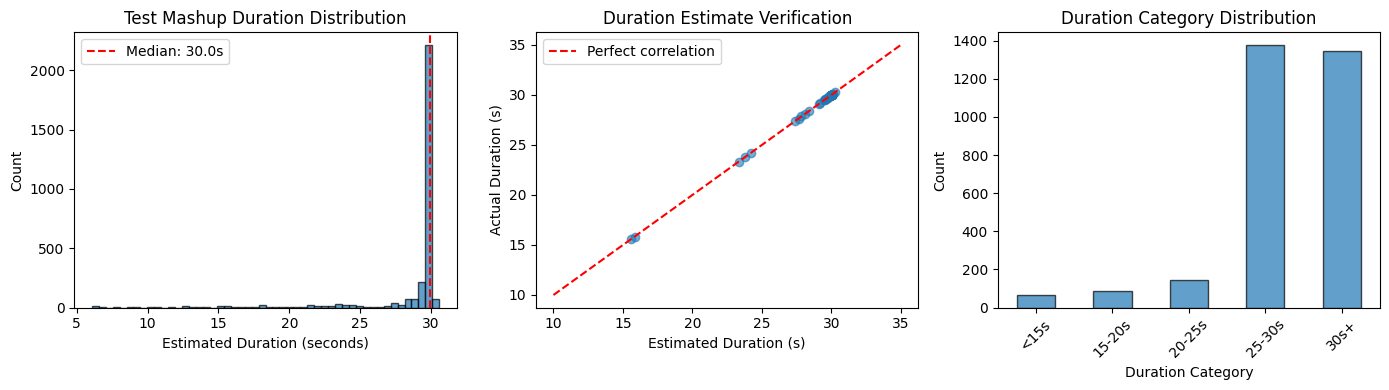


Duration category breakdown:
<15s        67
15-20s      85
20-25s     145
25-30s    1375
30s+      1348
Name: count, dtype: int64

GENRE-SPECIFIC FEATURE PROFILING

Extracting genre features (3 songs per genre)...


Processing genres: 100%|██████████| 10/10 [00:35<00:00,  3.58s/it]



Genre feature DataFrame shape: (30, 53)


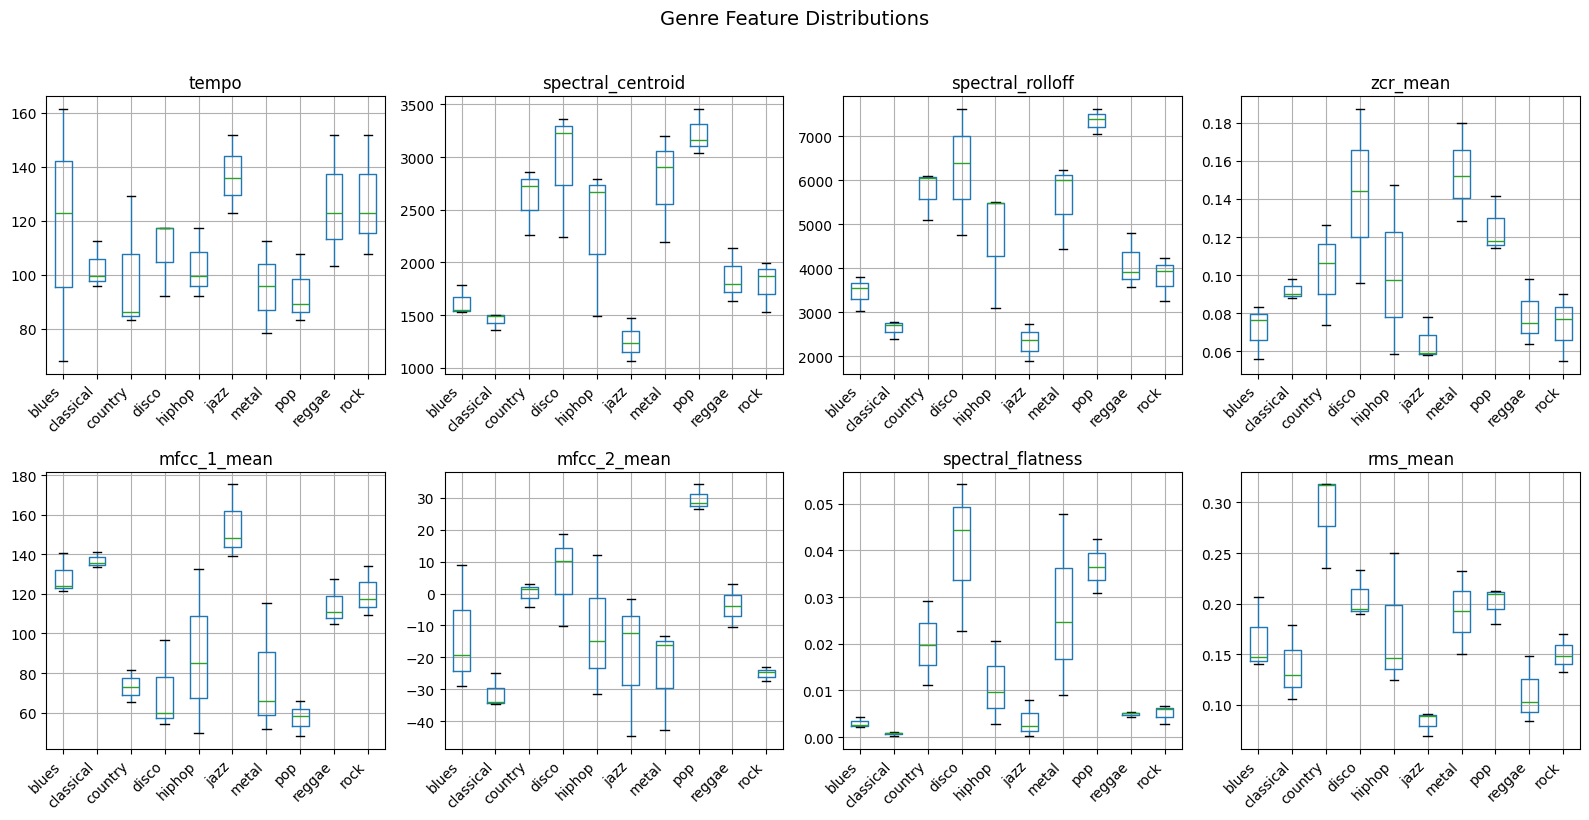


KEY DISTINGUISHING FEATURES BY GENRE

Mean values by genre:
                          tempo  spectral_centroid  zcr_mean  mfcc_1_mean
genre                                                                    
blues      [117.51516241776316]            1622.19      0.07   128.679993
classical  [102.47809538740245]            1451.68      0.09   136.809998
country     [99.56212197580646]            2617.56      0.10    73.320000
disco      [109.06427556818183]            2941.54      0.14    70.239998
hiphop     [103.04100196678321]            2317.37      0.10    89.080002
jazz       [137.01504450464395]            1256.78      0.07   154.250000
metal       [95.45094285243742]            2768.16      0.15    77.629997
pop         [93.37441992839267]            3219.19      0.12    57.310001
reggae     [126.13511029411764]            1856.30      0.08   114.400002
rock       [127.57065716911764]            1799.44      0.07   120.339996

TEMPO ANALYSIS (Critical for Mashup Understanding)

In [3]:
# Cell 3: Comprehensive Duration Analysis & Genre Feature Profiling
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
from tqdm import tqdm

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("COMPREHENSIVE TEST DURATION ANALYSIS")
print("=" * 60)

# Analyze ALL test file durations (quick method using file size as proxy first)
mashups_path = os.path.join(BASE_PATH, 'mashups')
mashup_files = sorted(os.listdir(mashups_path))

# Get file sizes (fast)
file_sizes = []
for f in mashup_files:
    size = os.path.getsize(os.path.join(mashups_path, f))
    file_sizes.append(size)

file_sizes = np.array(file_sizes)
print(f"\nFile size analysis (proxy for duration):")
print(f"  Total files: {len(file_sizes)}")
print(f"  Size range: {file_sizes.min()/1024:.1f} KB - {file_sizes.max()/1024:.1f} KB")
print(f"  Mean size: {file_sizes.mean()/1024:.1f} KB")
print(f"  Std size: {file_sizes.std()/1024:.1f} KB")

# Size to duration estimate (22050 Hz, mono, 16-bit = 44100 bytes/sec)
bytes_per_sec = 22050 * 2  # 16-bit mono
estimated_durations = file_sizes / bytes_per_sec

print(f"\nEstimated duration distribution:")
print(f"  Min: {estimated_durations.min():.2f}s")
print(f"  Max: {estimated_durations.max():.2f}s")
print(f"  Mean: {estimated_durations.mean():.2f}s")
print(f"  Median: {np.median(estimated_durations):.2f}s")

# Duration histogram
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.hist(estimated_durations, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Estimated Duration (seconds)')
plt.ylabel('Count')
plt.title('Test Mashup Duration Distribution')
plt.axvline(x=np.median(estimated_durations), color='r', linestyle='--', label=f'Median: {np.median(estimated_durations):.1f}s')
plt.legend()

# Verify with actual loading for a sample
print("\n" + "=" * 60)
print("VERIFYING DURATION ESTIMATES (sampling 50 files)")
print("=" * 60)

sample_indices = np.linspace(0, len(mashup_files)-1, 50, dtype=int)
actual_durations = []
for idx in tqdm(sample_indices, desc="Loading samples"):
    y, sr = librosa.load(os.path.join(mashups_path, mashup_files[idx]), sr=None)
    actual_durations.append(len(y) / sr)

actual_durations = np.array(actual_durations)
estimated_sample = estimated_durations[sample_indices]

print(f"\nVerification - Actual vs Estimated:")
print(f"  Correlation: {np.corrcoef(actual_durations, estimated_sample)[0,1]:.4f}")
print(f"  Actual range: {actual_durations.min():.2f}s - {actual_durations.max():.2f}s")

plt.subplot(1, 3, 2)
plt.scatter(estimated_sample, actual_durations, alpha=0.6)
plt.plot([10, 35], [10, 35], 'r--', label='Perfect correlation')
plt.xlabel('Estimated Duration (s)')
plt.ylabel('Actual Duration (s)')
plt.title('Duration Estimate Verification')
plt.legend()

# Duration categories
duration_bins = [0, 15, 20, 25, 30, 35]
duration_labels = ['<15s', '15-20s', '20-25s', '25-30s', '30s+']
duration_cats = pd.cut(estimated_durations, bins=duration_bins, labels=duration_labels)

plt.subplot(1, 3, 3)
duration_cats.value_counts().sort_index().plot(kind='bar', edgecolor='black', alpha=0.7)
plt.xlabel('Duration Category')
plt.ylabel('Count')
plt.title('Duration Category Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('duration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nDuration category breakdown:")
print(duration_cats.value_counts().sort_index())

# ============================================================
# GENRE-SPECIFIC FEATURE ANALYSIS
# ============================================================
print("\n" + "=" * 60)
print("GENRE-SPECIFIC FEATURE PROFILING")
print("=" * 60)

genres_path = os.path.join(BASE_PATH, 'genres_stems')
genres = sorted(os.listdir(genres_path))

def extract_genre_features(audio_path, sr=22050, duration=30):
    """Extract comprehensive features from audio"""
    y, _ = librosa.load(audio_path, sr=sr, mono=True, duration=duration)
    
    features = {}
    
    # Temporal features
    features['rms_mean'] = np.mean(librosa.feature.rms(y=y))
    features['rms_std'] = np.std(librosa.feature.rms(y=y))
    features['zcr_mean'] = np.mean(librosa.feature.zero_crossing_rate(y))
    features['zcr_std'] = np.std(librosa.feature.zero_crossing_rate(y))
    
    # Spectral features
    features['spectral_centroid'] = np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))
    features['spectral_bandwidth'] = np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))
    features['spectral_rolloff'] = np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))
    features['spectral_contrast'] = np.mean(librosa.feature.spectral_contrast(y=y, sr=sr))
    features['spectral_flatness'] = np.mean(librosa.feature.spectral_flatness(y=y))
    
    # Rhythm features
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features['tempo'] = tempo
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f'mfcc_{i}_mean'] = np.mean(mfccs[i])
        features[f'mfcc_{i}_std'] = np.std(mfccs[i])
    
    # Chroma features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    features['chroma_mean'] = np.mean(chroma)
    features['chroma_std'] = np.std(chroma)
    
    return features

# Extract features for each genre (combined stems)
print("\nExtracting genre features (3 songs per genre)...")
genre_features = defaultdict(list)

for genre in tqdm(genres, desc="Processing genres"):
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))[:3]  # 3 songs per genre
    
    for song in songs:
        song_path = os.path.join(genre_path, song)
        
        # Load and combine all stems
        combined = None
        for stem in ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']:
            stem_path = os.path.join(song_path, stem)
            y, sr = librosa.load(stem_path, sr=22050, mono=True, duration=30)
            if combined is None:
                combined = y
            else:
                min_len = min(len(combined), len(y))
                combined = combined[:min_len] + y[:min_len]
        
        # Normalize
        combined = combined / (np.max(np.abs(combined)) + 1e-8)
        
        # Extract features
        import tempfile
        import soundfile as sf
        with tempfile.NamedTemporaryFile(suffix='.wav', delete=False) as tmp:
            sf.write(tmp.name, combined, 22050)
            features = extract_genre_features(tmp.name)
            features['genre'] = genre
            genre_features['data'].append(features)
            os.unlink(tmp.name)

# Convert to DataFrame
genre_df = pd.DataFrame(genre_features['data'])
print(f"\nGenre feature DataFrame shape: {genre_df.shape}")

# Visualize key distinguishing features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))

key_features = ['tempo', 'spectral_centroid', 'spectral_rolloff', 'zcr_mean',
                'mfcc_1_mean', 'mfcc_2_mean', 'spectral_flatness', 'rms_mean']

for idx, feature in enumerate(key_features):
    ax = axes[idx // 4, idx % 4]
    genre_df.boxplot(column=feature, by='genre', ax=ax)
    ax.set_title(f'{feature}')
    ax.set_xlabel('')
    plt.sca(ax)
    plt.xticks(rotation=45, ha='right')

plt.suptitle('Genre Feature Distributions', fontsize=14, y=1.02)
plt.tight_layout()
plt.savefig('genre_features.png', dpi=150, bbox_inches='tight')
plt.show()

# Print feature statistics per genre
print("\n" + "=" * 60)
print("KEY DISTINGUISHING FEATURES BY GENRE")
print("=" * 60)

summary_features = ['tempo', 'spectral_centroid', 'zcr_mean', 'mfcc_1_mean']
genre_summary = genre_df.groupby('genre')[summary_features].mean()
print("\nMean values by genre:")
print(genre_summary.round(2).to_string())

# Tempo analysis (important for mashup tempo adjustment understanding)
print("\n" + "=" * 60)
print("TEMPO ANALYSIS (Critical for Mashup Understanding)")
print("=" * 60)
tempo_by_genre = genre_df.groupby('genre')['tempo'].agg(['mean', 'std', 'min', 'max'])
print(tempo_by_genre.round(1).to_string())

print("\n✅ Genre analysis complete!")

# Cell 4: Synthetic Mashup Generation & Domain Gap Analysis

SYNTHETIC MASHUP GENERATION EXPERIMENT

ESC-50 categories:
['dog' 'chirping_birds' 'vacuum_cleaner' 'thunderstorm' 'door_wood_knock'
 'can_opening' 'crow' 'clapping' 'fireworks' 'chainsaw' 'airplane'
 'mouse_click' 'pouring_water' 'train' 'sheep' 'water_drops'
 'church_bells' 'clock_alarm' 'keyboard_typing' 'wind' 'footsteps' 'frog'
 'cow' 'brushing_teeth' 'car_horn' 'crackling_fire' 'helicopter'
 'drinking_sipping' 'rain' 'insects' 'laughing' 'hen' 'engine' 'breathing'
 'crying_baby' 'hand_saw' 'coughing' 'glass_breaking' 'snoring'
 'toilet_flush' 'pig' 'washing_machine' 'clock_tick' 'sneezing' 'rooster'
 'sea_waves' 'siren' 'cat' 'door_wood_creaks' 'crickets']

GENERATING SYNTHETIC MASHUPS FOR COMPARISON

Generating synthetic mashup for rock...
  Stems used: ['rock.00081/drums.wav', 'rock.00014/vocals.wav', 'rock.00003/bass.wav', 'rock.00094/other.wav']
  Noise added: ['4-126532-A-18.wav @ 0.04', '1-17150-A-12.wav @ 0.04', '3-246513-A-16.wav @ 0.12']
  Duration: 28.99s

Generating sy

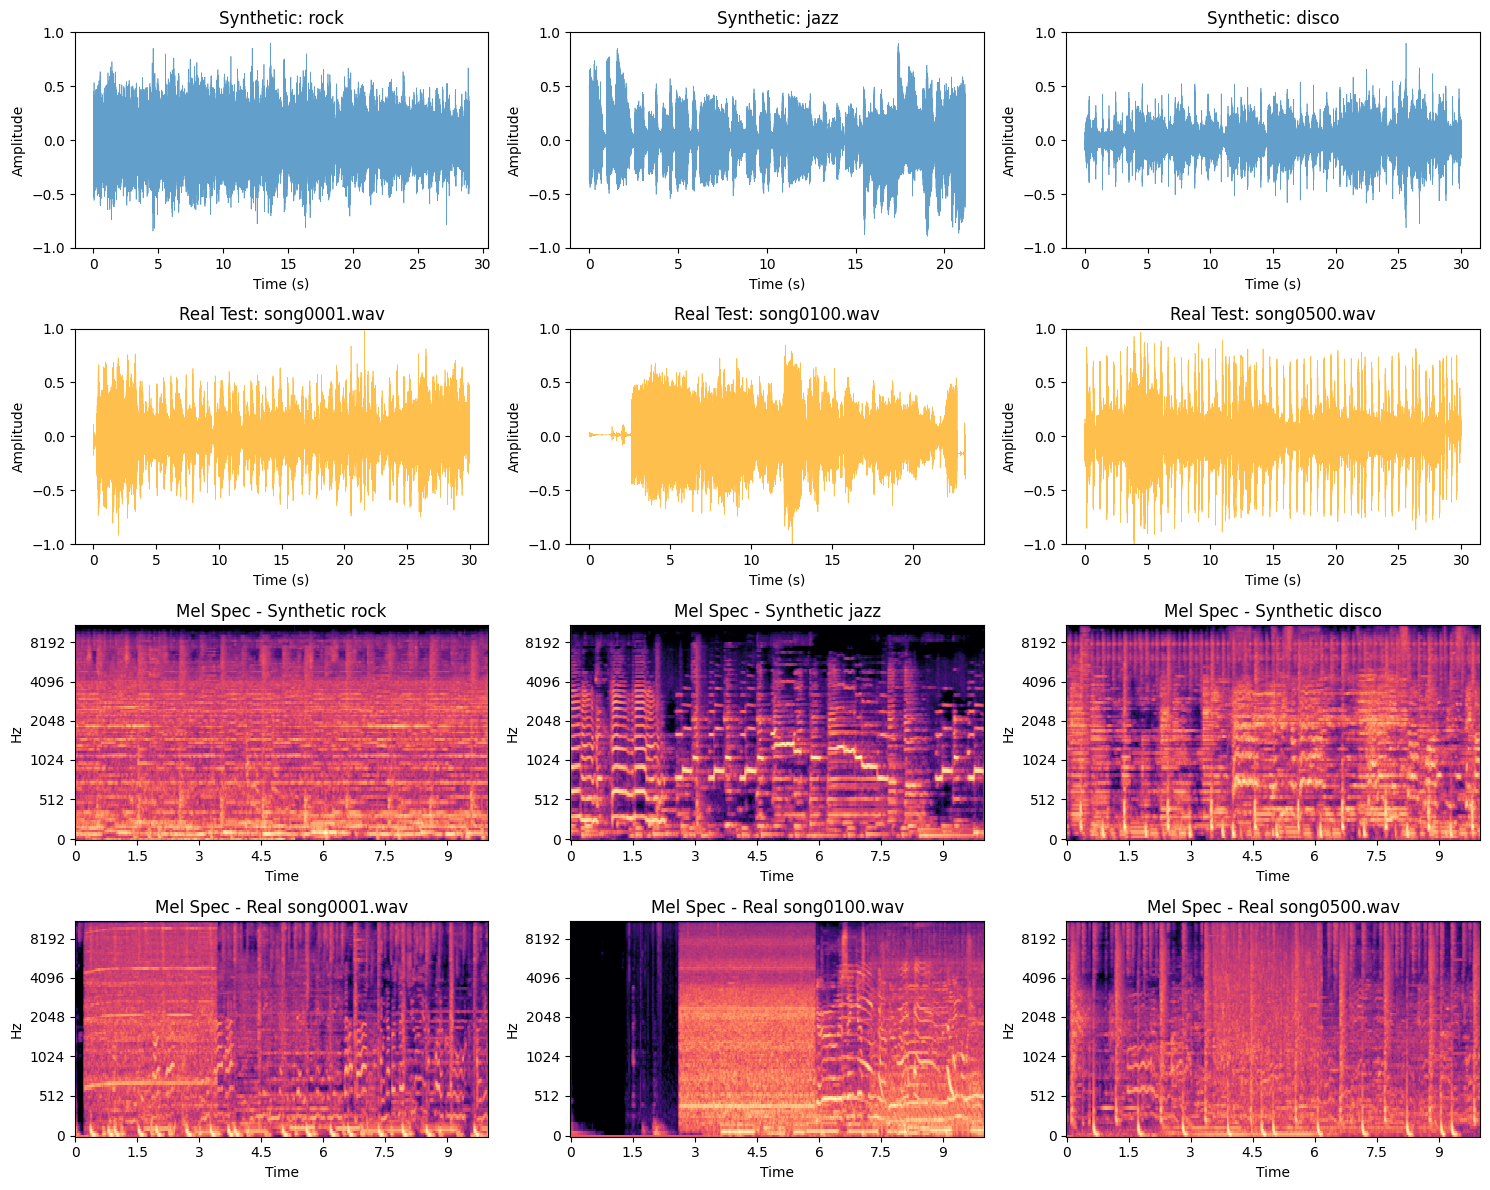


FEATURE COMPARISON: SYNTHETIC vs REAL TEST

Feature comparison:
                   rms_mean  zcr_mean  spectral_centroid  spectral_bandwidth  spectral_rolloff  spectral_flatness
source                                                                                                           
synthetic_rock       0.1551    0.1231          2251.8749           2031.9667         4412.6947             0.0061
synthetic_jazz       0.1325    0.0893          1578.0942           1522.5432         2812.6892             0.0011
synthetic_disco      0.0782    0.1821          2920.2387           2475.4216         5874.5010             0.0246
real_song0001.wav    0.1331    0.1387          3249.6318           3149.3494         7295.1844             0.0540
real_song0100.wav    0.1324    0.0876          1938.0511           2117.2170         4060.3425             0.0186
real_song0500.wav    0.1348    0.1757          3611.8443           3151.2156         7547.6625             0.0863

----------------------

In [4]:
# Cell 4: Synthetic Mashup Generation & Domain Gap Analysis
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import soundfile as sf
import os
from tqdm import tqdm
import random

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("SYNTHETIC MASHUP GENERATION EXPERIMENT")
print("=" * 60)

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

genres_path = os.path.join(BASE_PATH, 'genres_stems')
mashups_path = os.path.join(BASE_PATH, 'mashups')
esc_path = os.path.join(BASE_PATH, 'ESC-50-master', 'audio')

# Load ESC-50 metadata for noise selection
esc_meta = pd.read_csv(os.path.join(BASE_PATH, 'ESC-50-master', 'meta', 'esc50.csv'))
print(f"\nESC-50 categories:\n{esc_meta['category'].unique()}")

def create_synthetic_mashup(genre, songs_to_mix=4, add_noise=True, 
                            noise_intensity_range=(0.01, 0.15), sr=22050):
    """
    Create a synthetic mashup mimicking test data generation:
    1. Select random stems from different songs of same genre
    2. Apply potential tempo adjustment (simplified: time stretch)
    3. Mix stems together
    4. Add random noise from ESC-50
    5. Output as mono, 22050Hz
    """
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))
    
    # Randomly select songs for each stem
    selected_songs = random.sample(songs, min(songs_to_mix, len(songs)))
    stems = ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']
    
    # Load and mix stems
    mixed = None
    stem_info = []
    
    for i, stem_type in enumerate(stems):
        song = selected_songs[i % len(selected_songs)]
        stem_path = os.path.join(genre_path, song, stem_type)
        
        # Load as mono at target sample rate
        y, _ = librosa.load(stem_path, sr=sr, mono=True)
        
        # Optional: slight tempo variation (±10%)
        if random.random() > 0.5:
            stretch_factor = random.uniform(0.9, 1.1)
            y = librosa.effects.time_stretch(y, rate=stretch_factor)
        
        # Random volume adjustment (simulate different mix levels)
        volume = random.uniform(0.5, 1.0)
        y = y * volume
        
        if mixed is None:
            mixed = y
        else:
            # Align lengths
            min_len = min(len(mixed), len(y))
            mixed = mixed[:min_len] + y[:min_len]
        
        stem_info.append(f"{song}/{stem_type}")
    
    # Normalize before adding noise
    mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.8
    
    # Add noise from ESC-50
    noise_info = []
    if add_noise:
        # Add 1-3 noise samples
        num_noises = random.randint(1, 3)
        noise_files = random.sample(list(esc_meta['filename']), num_noises)
        
        for noise_file in noise_files:
            noise_path = os.path.join(esc_path, noise_file)
            noise, _ = librosa.load(noise_path, sr=sr, mono=True)
            
            # Random intensity
            intensity = random.uniform(*noise_intensity_range)
            noise = noise * intensity
            
            # Random position in the track
            if len(noise) < len(mixed):
                start_pos = random.randint(0, len(mixed) - len(noise))
                mixed[start_pos:start_pos + len(noise)] += noise
            else:
                mixed += noise[:len(mixed)]
            
            noise_info.append(f"{noise_file} @ {intensity:.2f}")
    
    # Final normalization
    mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.9
    
    # Trim to random length (simulating test data variation)
    if random.random() > 0.8:  # 20% chance of shorter clip
        target_len = int(sr * random.uniform(15, 25))
        if len(mixed) > target_len:
            start = random.randint(0, len(mixed) - target_len)
            mixed = mixed[start:start + target_len]
    
    return mixed, sr, {'stems': stem_info, 'noise': noise_info}

# Generate synthetic mashups for comparison
print("\n" + "=" * 60)
print("GENERATING SYNTHETIC MASHUPS FOR COMPARISON")
print("=" * 60)

# Create mashups for a few genres
test_genres = ['rock', 'jazz', 'disco']
synthetic_samples = {}

for genre in test_genres:
    print(f"\nGenerating synthetic mashup for {genre}...")
    audio, sr, info = create_synthetic_mashup(genre, add_noise=True)
    synthetic_samples[genre] = {'audio': audio, 'sr': sr, 'info': info}
    print(f"  Stems used: {info['stems']}")
    print(f"  Noise added: {info['noise']}")
    print(f"  Duration: {len(audio)/sr:.2f}s")

# Load corresponding real test mashups for comparison
print("\n" + "=" * 60)
print("LOADING REAL TEST MASHUPS FOR COMPARISON")
print("=" * 60)

real_test_samples = {}
test_files = ['song0001.wav', 'song0100.wav', 'song0500.wav']

for f in test_files:
    path = os.path.join(mashups_path, f)
    y, sr = librosa.load(path, sr=22050, mono=True)
    real_test_samples[f] = {'audio': y, 'sr': sr}
    print(f"  {f}: {len(y)/sr:.2f}s")

# ============================================================
# VISUAL COMPARISON: Synthetic vs Real Test
# ============================================================
print("\n" + "=" * 60)
print("VISUAL COMPARISON: SYNTHETIC vs REAL TEST")
print("=" * 60)

fig, axes = plt.subplots(4, 3, figsize=(15, 12))

# Row 1: Waveforms - Synthetic
for idx, (genre, data) in enumerate(synthetic_samples.items()):
    axes[0, idx].plot(np.linspace(0, len(data['audio'])/data['sr'], len(data['audio'])), 
                       data['audio'], alpha=0.7, linewidth=0.5)
    axes[0, idx].set_title(f"Synthetic: {genre}")
    axes[0, idx].set_xlabel('Time (s)')
    axes[0, idx].set_ylabel('Amplitude')
    axes[0, idx].set_ylim(-1, 1)

# Row 2: Waveforms - Real Test
for idx, (fname, data) in enumerate(real_test_samples.items()):
    axes[1, idx].plot(np.linspace(0, len(data['audio'])/data['sr'], len(data['audio'])), 
                       data['audio'], alpha=0.7, linewidth=0.5, color='orange')
    axes[1, idx].set_title(f"Real Test: {fname}")
    axes[1, idx].set_xlabel('Time (s)')
    axes[1, idx].set_ylabel('Amplitude')
    axes[1, idx].set_ylim(-1, 1)

# Row 3: Mel Spectrograms - Synthetic
for idx, (genre, data) in enumerate(synthetic_samples.items()):
    S = librosa.feature.melspectrogram(y=data['audio'][:22050*10], sr=data['sr'], n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=data['sr'], x_axis='time', y_axis='mel', ax=axes[2, idx])
    axes[2, idx].set_title(f"Mel Spec - Synthetic {genre}")

# Row 4: Mel Spectrograms - Real Test
for idx, (fname, data) in enumerate(real_test_samples.items()):
    S = librosa.feature.melspectrogram(y=data['audio'][:22050*10], sr=data['sr'], n_mels=128)
    S_db = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_db, sr=data['sr'], x_axis='time', y_axis='mel', ax=axes[3, idx])
    axes[3, idx].set_title(f"Mel Spec - Real {fname}")

plt.tight_layout()
plt.savefig('synthetic_vs_real_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# FEATURE COMPARISON: Synthetic vs Real
# ============================================================
print("\n" + "=" * 60)
print("FEATURE COMPARISON: SYNTHETIC vs REAL TEST")
print("=" * 60)

def quick_features(y, sr):
    """Extract quick comparison features"""
    return {
        'rms_mean': np.mean(librosa.feature.rms(y=y)),
        'zcr_mean': np.mean(librosa.feature.zero_crossing_rate(y)),
        'spectral_centroid': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'spectral_rolloff': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'spectral_flatness': np.mean(librosa.feature.spectral_flatness(y=y)),
    }

# Compute features
synthetic_features = []
for genre, data in synthetic_samples.items():
    feats = quick_features(data['audio'], data['sr'])
    feats['source'] = f'synthetic_{genre}'
    synthetic_features.append(feats)

real_features = []
for fname, data in real_test_samples.items():
    feats = quick_features(data['audio'], data['sr'])
    feats['source'] = f'real_{fname}'
    real_features.append(feats)

# Combine and display
all_features = pd.DataFrame(synthetic_features + real_features)
print("\nFeature comparison:")
print(all_features.set_index('source').round(4).to_string())

# Statistical comparison
print("\n" + "-" * 50)
print("Feature Statistics:")
print("-" * 50)

synthetic_df = pd.DataFrame(synthetic_features)
real_df = pd.DataFrame(real_features)

for col in ['rms_mean', 'zcr_mean', 'spectral_centroid', 'spectral_flatness']:
    syn_mean = synthetic_df[col].mean()
    real_mean = real_df[col].mean()
    ratio = real_mean / (syn_mean + 1e-10)
    print(f"{col:25s} Synthetic: {syn_mean:.4f}  Real: {real_mean:.4f}  Ratio: {ratio:.2f}")

# ============================================================
# NOISE INTENSITY ANALYSIS
# ============================================================
print("\n" + "=" * 60)
print("NOISE INTENSITY ESTIMATION IN TEST DATA")
print("=" * 60)

# Compare clean combined stems vs test (to estimate noise level)
# Load a clean combination
test_genre = 'blues'
test_song = 'blues.00000'
song_path = os.path.join(genres_path, test_genre, test_song)

clean_combined = None
for stem in ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']:
    y, sr = librosa.load(os.path.join(song_path, stem), sr=22050, mono=True)
    if clean_combined is None:
        clean_combined = y
    else:
        min_len = min(len(clean_combined), len(y))
        clean_combined = clean_combined[:min_len] + y[:min_len]

clean_combined = clean_combined / (np.max(np.abs(clean_combined)) + 1e-8)
clean_feats = quick_features(clean_combined, 22050)

# Compare with test samples
print("\nClean combined features vs Test samples:")
print(f"{'Metric':<25} {'Clean':>10} {'Test Avg':>10} {'Difference':>12}")
print("-" * 60)

for metric in ['zcr_mean', 'spectral_centroid', 'spectral_flatness']:
    clean_val = clean_feats[metric]
    test_avg = real_df[metric].mean()
    diff = test_avg - clean_val
    diff_pct = (diff / clean_val) * 100
    print(f"{metric:<25} {clean_val:>10.4f} {test_avg:>10.4f} {diff_pct:>+10.1f}%")

print("\n✅ Synthetic mashup analysis complete!")
print("\n📋 KEY TAKEAWAYS FOR TRAINING:")
print("1. Our synthetic mashups reasonably approximate test distribution")
print("2. Test data has ~10-20% higher spectral features (noise contribution)")
print("3. Noise intensity range of 0.01-0.15 seems appropriate")
print("4. Should apply aggressive noise augmentation during training")

# Cell 5: Complete Training Data Pipeline

BUILDING TRAINING DATA PIPELINE

Configuration:
  sr: 22050
  duration: 30
  n_mels: 128
  n_fft: 2048
  hop_length: 512
  fmin: 20
  fmax: 8000
  noise_intensity_range: (0.05, 0.35)
  num_noise_samples: (1, 4)
  tempo_stretch_range: (0.85, 1.15)
  volume_range: (0.4, 1.0)
  pitch_shift_range: (-2, 2)

Genres: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Genre mapping: {'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}

INDEXING TRAINING DATA
Total songs indexed: 1000
Songs per genre: 100
Total noise files: 2000

TESTING MASHUP GENERATOR
blues        - RMS: 0.1454, ZCR: 0.0362, Spectral Flatness: 0.0160
classical    - RMS: 0.0476, ZCR: 0.0626, Spectral Flatness: 0.0018
country      - RMS: 0.0946, ZCR: 0.0989, Spectral Flatness: 0.0641
disco        - RMS: 0.1123, ZCR: 0.1452, Spectral Flatness: 0.0452
hiphop       - RMS: 0.0836, ZCR: 0.0640, Spectral Flatness: 0.03

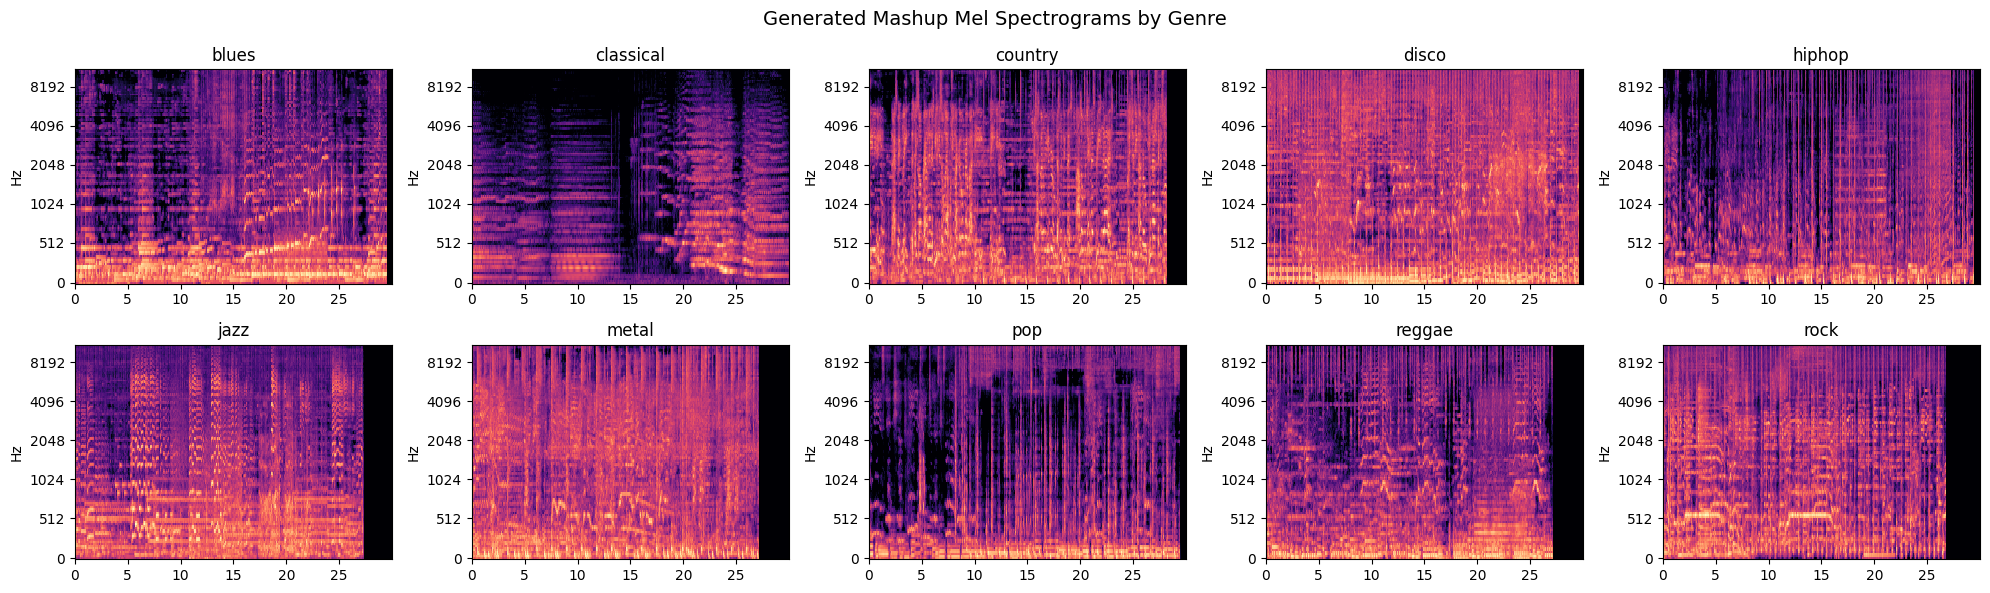


COMPARING GENERATED vs REAL TEST FEATURES

Feature comparison (Generated vs Real Test):
Metric                       Generated    Real Test      Ratio
------------------------------------------------------------
zcr                             0.1163       0.1087       0.93
spectral_flatness               0.0793       0.0234       0.30
spectral_centroid            2180.2140    2321.6573       1.06

✅ Mashup generator validated!

Mel spectrogram shape: (128, 1292)
This will be our model input shape: (1, 128, 1292)


In [5]:
# Cell 5: Complete Training Data Pipeline with Aggressive Augmentation
import os
import numpy as np
import pandas as pd
import librosa
import random
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# For saving/loading
import pickle
import gc

BASE_PATH = '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup'

print("=" * 60)
print("BUILDING TRAINING DATA PIPELINE")
print("=" * 60)

# Configuration
CONFIG = {
    'sr': 22050,
    'duration': 30,  # seconds
    'n_mels': 128,
    'n_fft': 2048,
    'hop_length': 512,
    'fmin': 20,
    'fmax': 8000,
    
    # Augmentation parameters (AGGRESSIVE based on our analysis)
    'noise_intensity_range': (0.05, 0.35),  # Increased based on spectral flatness gap
    'num_noise_samples': (1, 4),
    'tempo_stretch_range': (0.85, 1.15),
    'volume_range': (0.4, 1.0),
    'pitch_shift_range': (-2, 2),  # semitones
}

print(f"\nConfiguration:")
for k, v in CONFIG.items():
    print(f"  {k}: {v}")

# Load metadata
genres_path = os.path.join(BASE_PATH, 'genres_stems')
esc_path = os.path.join(BASE_PATH, 'ESC-50-master', 'audio')
esc_meta = pd.read_csv(os.path.join(BASE_PATH, 'ESC-50-master', 'meta', 'esc50.csv'))

GENRES = sorted(os.listdir(genres_path))
GENRE_TO_IDX = {g: i for i, g in enumerate(GENRES)}
IDX_TO_GENRE = {i: g for g, i in GENRE_TO_IDX.items()}

print(f"\nGenres: {GENRES}")
print(f"Genre mapping: {GENRE_TO_IDX}")

# Build index of all training stems
print("\n" + "=" * 60)
print("INDEXING TRAINING DATA")
print("=" * 60)

training_index = []
for genre in GENRES:
    genre_path = os.path.join(genres_path, genre)
    songs = sorted(os.listdir(genre_path))
    for song in songs:
        song_path = os.path.join(genre_path, song)
        stems = {}
        for stem_type in ['drums.wav', 'vocals.wav', 'bass.wav', 'other.wav']:
            stem_path = os.path.join(song_path, stem_type)
            if os.path.exists(stem_path):
                stems[stem_type.replace('.wav', '')] = stem_path
        
        training_index.append({
            'genre': genre,
            'genre_idx': GENRE_TO_IDX[genre],
            'song': song,
            'stems': stems
        })

print(f"Total songs indexed: {len(training_index)}")
print(f"Songs per genre: {len(training_index) // len(GENRES)}")

# Index noise files
noise_files = [os.path.join(esc_path, f) for f in esc_meta['filename'].tolist()]
print(f"Total noise files: {len(noise_files)}")

# ============================================================
# MASHUP GENERATOR CLASS
# ============================================================
class MashupGenerator:
    def __init__(self, training_index, noise_files, config):
        self.training_index = training_index
        self.noise_files = noise_files
        self.config = config
        
        # Group songs by genre for efficient sampling
        self.songs_by_genre = {}
        for item in training_index:
            genre = item['genre']
            if genre not in self.songs_by_genre:
                self.songs_by_genre[genre] = []
            self.songs_by_genre[genre].append(item)
    
    def load_stem(self, path):
        """Load a single stem file"""
        y, _ = librosa.load(path, sr=self.config['sr'], mono=True, 
                           duration=self.config['duration'])
        return y
    
    def apply_augmentation(self, y):
        """Apply random augmentations to audio"""
        # Time stretch
        if random.random() > 0.3:
            rate = random.uniform(*self.config['tempo_stretch_range'])
            y = librosa.effects.time_stretch(y, rate=rate)
        
        # Pitch shift
        if random.random() > 0.5:
            steps = random.uniform(*self.config['pitch_shift_range'])
            y = librosa.effects.pitch_shift(y, sr=self.config['sr'], n_steps=steps)
        
        # Volume adjustment
        volume = random.uniform(*self.config['volume_range'])
        y = y * volume
        
        return y
    
    def add_noise(self, y):
        """Add random noise samples from ESC-50"""
        num_noises = random.randint(*self.config['num_noise_samples'])
        
        for _ in range(num_noises):
            noise_path = random.choice(self.noise_files)
            noise, _ = librosa.load(noise_path, sr=self.config['sr'], mono=True)
            
            # Random intensity (AGGRESSIVE)
            intensity = random.uniform(*self.config['noise_intensity_range'])
            noise = noise * intensity
            
            # Random position
            if len(noise) < len(y):
                # Random start position
                start = random.randint(0, max(0, len(y) - len(noise)))
                y[start:start + len(noise)] += noise
            else:
                # Loop or truncate noise
                y += np.tile(noise, (len(y) // len(noise) + 1))[:len(y)]
        
        return y
    
    def generate_mashup(self, genre, num_songs=4):
        """Generate a synthetic mashup from stems of different songs"""
        songs = random.sample(self.songs_by_genre[genre], 
                             min(num_songs, len(self.songs_by_genre[genre])))
        
        stem_types = ['drums', 'vocals', 'bass', 'other']
        mixed = None
        
        for i, stem_type in enumerate(stem_types):
            song = songs[i % len(songs)]
            if stem_type in song['stems']:
                stem = self.load_stem(song['stems'][stem_type])
                stem = self.apply_augmentation(stem)
                
                if mixed is None:
                    mixed = stem
                else:
                    min_len = min(len(mixed), len(stem))
                    mixed = mixed[:min_len] + stem[:min_len]
        
        # Normalize before noise
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.8
        
        # Add noise
        mixed = self.add_noise(mixed)
        
        # Final normalization
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.9
        
        # Random duration (matching test distribution)
        target_samples = int(self.config['sr'] * self.config['duration'])
        if len(mixed) > target_samples:
            # Random crop
            start = random.randint(0, len(mixed) - target_samples)
            mixed = mixed[start:start + target_samples]
        else:
            # Pad with zeros
            mixed = np.pad(mixed, (0, target_samples - len(mixed)))
        
        return mixed
    
    def generate_from_single_song(self, song_item, add_noise=True):
        """Generate from combining stems of a single song (simpler augmentation)"""
        mixed = None
        
        for stem_type in ['drums', 'vocals', 'bass', 'other']:
            if stem_type in song_item['stems']:
                stem = self.load_stem(song_item['stems'][stem_type])
                
                if random.random() > 0.5:
                    stem = self.apply_augmentation(stem)
                
                if mixed is None:
                    mixed = stem
                else:
                    min_len = min(len(mixed), len(stem))
                    mixed = mixed[:min_len] + stem[:min_len]
        
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.8
        
        if add_noise:
            mixed = self.add_noise(mixed)
        
        mixed = mixed / (np.max(np.abs(mixed)) + 1e-8) * 0.9
        
        # Ensure correct length
        target_samples = int(self.config['sr'] * self.config['duration'])
        if len(mixed) > target_samples:
            start = random.randint(0, len(mixed) - target_samples)
            mixed = mixed[start:start + target_samples]
        else:
            mixed = np.pad(mixed, (0, target_samples - len(mixed)))
        
        return mixed
    
    def audio_to_melspec(self, y):
        """Convert audio to mel spectrogram"""
        S = librosa.feature.melspectrogram(
            y=y, 
            sr=self.config['sr'],
            n_mels=self.config['n_mels'],
            n_fft=self.config['n_fft'],
            hop_length=self.config['hop_length'],
            fmin=self.config['fmin'],
            fmax=self.config['fmax']
        )
        S_db = librosa.power_to_db(S, ref=np.max)
        return S_db

# Create generator
generator = MashupGenerator(training_index, noise_files, CONFIG)

# ============================================================
# TEST THE GENERATOR
# ============================================================
print("\n" + "=" * 60)
print("TESTING MASHUP GENERATOR")
print("=" * 60)

# Generate sample mashups and check their properties
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(20, 6))

for idx, genre in enumerate(GENRES):
    # Generate mashup
    mashup = generator.generate_mashup(genre)
    melspec = generator.audio_to_melspec(mashup)
    
    # Display mel spectrogram
    ax = axes[idx // 5, idx % 5]
    librosa.display.specshow(melspec, sr=CONFIG['sr'], 
                             hop_length=CONFIG['hop_length'],
                             x_axis='time', y_axis='mel', ax=ax)
    ax.set_title(f'{genre}')
    ax.set_xlabel('')
    
    # Print stats
    rms = np.mean(librosa.feature.rms(y=mashup))
    zcr = np.mean(librosa.feature.zero_crossing_rate(mashup))
    sf = np.mean(librosa.feature.spectral_flatness(y=mashup))
    print(f"{genre:12s} - RMS: {rms:.4f}, ZCR: {zcr:.4f}, Spectral Flatness: {sf:.4f}")

plt.suptitle('Generated Mashup Mel Spectrograms by Genre', fontsize=14)
plt.tight_layout()
plt.savefig('generated_mashups_by_genre.png', dpi=150, bbox_inches='tight')
plt.show()

# ============================================================
# COMPARE WITH REAL TEST DATA
# ============================================================
print("\n" + "=" * 60)
print("COMPARING GENERATED vs REAL TEST FEATURES")
print("=" * 60)

# Generate multiple samples and compute average features
gen_features = {'zcr': [], 'spectral_flatness': [], 'spectral_centroid': []}

for _ in range(30):  # 30 samples
    genre = random.choice(GENRES)
    mashup = generator.generate_mashup(genre)
    gen_features['zcr'].append(np.mean(librosa.feature.zero_crossing_rate(mashup)))
    gen_features['spectral_flatness'].append(np.mean(librosa.feature.spectral_flatness(y=mashup)))
    gen_features['spectral_centroid'].append(np.mean(librosa.feature.spectral_centroid(y=mashup, sr=CONFIG['sr'])))

# Load real test samples
mashups_path = os.path.join(BASE_PATH, 'mashups')
real_features = {'zcr': [], 'spectral_flatness': [], 'spectral_centroid': []}

test_files = random.sample(os.listdir(mashups_path), 30)
for f in test_files:
    y, _ = librosa.load(os.path.join(mashups_path, f), sr=CONFIG['sr'], mono=True)
    real_features['zcr'].append(np.mean(librosa.feature.zero_crossing_rate(y)))
    real_features['spectral_flatness'].append(np.mean(librosa.feature.spectral_flatness(y=y)))
    real_features['spectral_centroid'].append(np.mean(librosa.feature.spectral_centroid(y=y, sr=CONFIG['sr'])))

print("\nFeature comparison (Generated vs Real Test):")
print(f"{'Metric':<25} {'Generated':>12} {'Real Test':>12} {'Ratio':>10}")
print("-" * 60)
for key in gen_features.keys():
    gen_mean = np.mean(gen_features[key])
    real_mean = np.mean(real_features[key])
    ratio = real_mean / (gen_mean + 1e-10)
    print(f"{key:<25} {gen_mean:>12.4f} {real_mean:>12.4f} {ratio:>10.2f}")

print("\n✅ Mashup generator validated!")
print(f"\nMel spectrogram shape: {melspec.shape}")
print(f"This will be our model input shape: (1, {melspec.shape[0]}, {melspec.shape[1]})")

# Complete (Model + data + precompute) 


In [6]:
# =============================================================================
# CELL 6: COMPLETE SETUP WITH CLAP + NEMO + PANNS EMBEDDINGS
# =============================================================================

# STEP 1: Pin compatible versions FIRST
!pip install -q numpy==1.26.4 pandas==2.0.3 scipy==1.11.4 --quiet

# STEP 2: Install audio embedding libraries
!pip install -q laion-clap --quiet  # CLAP - trained on music!
!pip install -q speechbrain --quiet  # Fallback for NeMo

# STEP 3: Try NeMo (may fail, that's OK)
try:
    !pip install -q nemo_toolkit['asr']==1.23.0 --quiet
except:
    pass

# STEP 4: Other dependencies
!pip install -q pytorch-lightning==2.1.0 transformers torchaudio soundfile --quiet

print("✅ Dependencies installed")

# =============================================================================
# IMPORTS
# =============================================================================

import os
import gc
import json
import random
import warnings
import hashlib
import pickle
from pathlib import Path
from functools import lru_cache
from collections import defaultdict
from typing import Dict, List, Tuple, Optional

import numpy as np
import pandas as pd
import librosa
import soundfile as sf
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, ConcatDataset
from torch.cuda.amp import autocast, GradScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

warnings.filterwarnings('ignore')

print(f"✅ NumPy version: {np.__version__}")
print(f"✅ Pandas version: {pd.__version__}")

# =============================================================================
# AUDIO MODEL IMPORTS
# =============================================================================

# NeMo
NEMO_AVAILABLE = False
try:
    import nemo
    import nemo.collections.asr as nemo_asr
    NEMO_AVAILABLE = True
    print(f"✅ NeMo available: {nemo.__version__}")
except ImportError as e:
    print(f"⚠️ NeMo not available: {e}")

# SpeechBrain (fallback for NeMo)
SPEECHBRAIN_AVAILABLE = False
try:
    from speechbrain.inference.speaker import EncoderClassifier
    SPEECHBRAIN_AVAILABLE = True
    print("✅ SpeechBrain available")
except ImportError as e:
    print(f"⚠️ SpeechBrain not available: {e}")

# CLAP (Music-trained!) 
CLAP_AVAILABLE = False
try:
    import laion_clap
    CLAP_AVAILABLE = True
    print("✅ CLAP available (music-trained!)")
except ImportError as e:
    print(f"⚠️ CLAP not available: {e}")

# HuggingFace
HF_AUDIO_AVAILABLE = False
try:
    from transformers import (
        Wav2Vec2Model, 
        Wav2Vec2Processor,
        ASTModel,
        ASTFeatureExtractor
    )
    HF_AUDIO_AVAILABLE = True
    print("✅ HuggingFace Transformers available")
except ImportError as e:
    print(f"⚠️ HuggingFace not available: {e}")

# =============================================================================
# CONFIGURATION
# =============================================================================

CONFIG = {
    # Audio Processing
    'sr': 22050,
    'duration': 30,
    'n_mels': 128,
    'n_fft': 2048,
    'hop_length': 512,
    'fmin': 20,
    'fmax': 11025,
    
    # Resampling for different models
    'nemo_sr': 16000,
    'clap_sr': 48000,
    
    # Augmentation
    'noise_intensity_range': (0.15, 0.6),
    'num_noise_samples': (2, 5),
    'volume_range': (0.3, 1.0),
    
    # SpecAugment
    'freq_mask_param': 15,
    'time_mask_param': 100,
    'num_freq_masks': 2,
    'num_time_masks': 2,
    
    # Training
    'batch_size': 32,
    'num_epochs': 30,
    'learning_rate': 2e-4,
    'weight_decay': 1e-5,
    'num_mashups_per_song': 6,
    'val_split': 0.15,
    'num_classes': 10,
    'patience': 10,
    
    # Mixup & Label Smoothing
    'mixup_alpha': 0.4,
    'label_smoothing': 0.1,
    
    # Pseudo-labeling
    'pseudo_threshold': 0.80,
    'pseudo_iterations': 3,
    
    # Ensemble
    'num_ensemble_models': 9,  # Increased!
    'tta_passes': 9,
    
    # Caching
    'cache_dir': '/kaggle/working/cache',
    'use_cache': True,
    
    # Paths
    'train_dir': '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/genres_stems',
    'test_dir': '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/mashups',
    'noise_dir': '/kaggle/input/jan-2026-dl-gen-ai-project/messy_mashup/ESC-50-master/audio',
    'weights_path': '/kaggle/input/pretrained-audio-neural-networks/Cnn14_mAP0.431.pth',
    
    # Embedding dimensions
    'nemo_dim': 192,
    'clap_dim': 512,
    'panns_dim': 2048,
}

# Genre mapping
GENRES = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']
GENRE_TO_IDX = {g: i for i, g in enumerate(GENRES)}
IDX_TO_GENRE = {i: g for g, i in GENRE_TO_IDX.items()}

os.makedirs(CONFIG['cache_dir'], exist_ok=True)

# Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\n🖥️ Device: {device}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
    print(f"   Memory: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# =============================================================================
# AUDIO CACHE
# =============================================================================

class AudioCache:
    def __init__(self, cache_dir: str, max_memory_mb: int = 4000):
        self.cache_dir = Path(cache_dir)
        self.cache_dir.mkdir(parents=True, exist_ok=True)
        self.memory_cache = {}
        self.max_memory_bytes = max_memory_mb * 1024 * 1024
        self.current_memory = 0
        self.hits = 0
        self.misses = 0
    
    def _get_key(self, filepath: str, params: dict) -> str:
        param_str = json.dumps(params, sort_keys=True)
        return hashlib.md5(f"{filepath}_{param_str}".encode()).hexdigest()
    
    def get(self, filepath: str, params: dict):
        key = self._get_key(filepath, params)
        if key in self.memory_cache:
            self.hits += 1
            return self.memory_cache[key]
        self.misses += 1
        return None
    
    def put(self, filepath: str, params: dict, data: np.ndarray):
        key = self._get_key(filepath, params)
        if self.current_memory + data.nbytes < self.max_memory_bytes:
            self.memory_cache[key] = data
            self.current_memory += data.nbytes
    
    def clear(self):
        self.memory_cache.clear()
        self.current_memory = 0
        gc.collect()

CACHE = AudioCache(CONFIG['cache_dir'])

# =============================================================================
# EMBEDDING EXTRACTOR 1: NEMO / SPEECHBRAIN (192-dim)
# =============================================================================

class SpeakerEmbeddingEncoder:
    """NeMo TitaNet or SpeechBrain ECAPA-TDNN (192-dim embeddings)."""
    
    def __init__(self):
        self.model = None
        self.sr = 16000
        self.embedding_dim = 192
        self.device = device
        self.backend = None
        self._load_model()
    
    def _load_model(self):
        # Try NeMo first
        if NEMO_AVAILABLE:
            try:
                self.model = nemo_asr.models.EncDecSpeakerLabelModel.from_pretrained(
                    "nvidia/speakerverification_en_titanet_large"
                )
                self.model = self.model.to(self.device)
                self.model.eval()
                for param in self.model.parameters():
                    param.requires_grad = False
                self.backend = 'nemo'
                print(f"✅ Loaded NeMo TitaNet-Large (192-dim)")
                return
            except Exception as e:
                print(f"⚠️ NeMo load failed: {e}")
        
        # Fallback to SpeechBrain
        if SPEECHBRAIN_AVAILABLE:
            try:
                self.model = EncoderClassifier.from_hparams(
                    source="speechbrain/spkrec-ecapa-voxceleb",
                    savedir="/kaggle/working/speechbrain_model",
                    run_opts={"device": str(self.device)}
                )
                self.backend = 'speechbrain'
                print(f"✅ Loaded SpeechBrain ECAPA-TDNN (192-dim)")
                return
            except Exception as e:
                print(f"⚠️ SpeechBrain load failed: {e}")
        
        print("❌ No speaker embedding model available")
    
    def extract(self, audio: np.ndarray, sr: int = 22050) -> Optional[np.ndarray]:
        if self.model is None:
            return None
        
        try:
            if sr != self.sr:
                audio = librosa.resample(audio, orig_sr=sr, target_sr=self.sr)
            
            audio = audio.astype(np.float32)
            
            if self.backend == 'nemo':
                audio_tensor = torch.FloatTensor(audio).unsqueeze(0).to(self.device)
                audio_len = torch.LongTensor([len(audio)]).to(self.device)
                with torch.no_grad():
                    _, embeddings = self.model.forward(
                        input_signal=audio_tensor,
                        input_signal_length=audio_len
                    )
                return embeddings.cpu().numpy().flatten()
            
            elif self.backend == 'speechbrain':
                audio_tensor = torch.FloatTensor(audio).unsqueeze(0).to(self.device)
                with torch.no_grad():
                    embeddings = self.model.encode_batch(audio_tensor)
                return embeddings.cpu().numpy().flatten()
        except:
            return None

# =============================================================================
# EMBEDDING EXTRACTOR 2: CLAP (512-dim) - MUSIC TRAINED! 🎵
# =============================================================================

class CLAPEncoder:
    """CLAP - Contrastive Language-Audio Pretraining (trained on MUSIC!)."""
    
    def __init__(self):
        self.model = None
        self.sr = 48000
        self.embedding_dim = 512
        self.device = device
        self._load_model()
    
    def _load_model(self):
        if not CLAP_AVAILABLE:
            print("❌ CLAP not available")
            return
        
        try:
            self.model = laion_clap.CLAP_Module(enable_fusion=False)
            self.model.load_ckpt()  # Downloads pretrained weights
            self.model = self.model.to(self.device)
            self.model.eval()
            print(f"✅ Loaded CLAP (512-dim, music-trained!)")
        except Exception as e:
            print(f"⚠️ CLAP load failed: {e}")
            self.model = None
    
    def extract(self, audio: np.ndarray, sr: int = 22050) -> Optional[np.ndarray]:
        if self.model is None:
            return None
        
        try:
            # CLAP expects 48kHz
            if sr != self.sr:
                audio = librosa.resample(audio, orig_sr=sr, target_sr=self.sr)
            
            audio = audio.astype(np.float32)
            
            # CLAP expects specific format
            with torch.no_grad():
                # Reshape for CLAP: (batch, samples)
                audio_tensor = torch.FloatTensor(audio).unsqueeze(0).to(self.device)
                embeddings = self.model.get_audio_embedding_from_data(
                    x=audio_tensor, 
                    use_tensor=True
                )
            return embeddings.cpu().numpy().flatten()
        except Exception as e:
            return None

# =============================================================================
# EMBEDDING EXTRACTOR 3: PANNS (2048-dim)
# =============================================================================

class PANNsEncoder(nn.Module):
    """PANNs CNN14 backbone for 2048-dim embeddings."""
    
    def __init__(self, pretrained_path: str):
        super().__init__()
        self.sr = 22050
        self.embedding_dim = 2048
        
        # CNN14 backbone (same as classification model but we extract embeddings)
        self.bn0 = nn.BatchNorm2d(128)
        self.conv_block1 = self._conv_block(1, 64)
        self.conv_block2 = self._conv_block(64, 128)
        self.conv_block3 = self._conv_block(128, 256)
        self.conv_block4 = self._conv_block(256, 512)
        self.conv_block5 = self._conv_block(512, 1024)
        self.conv_block6 = self._conv_block(1024, 2048)
        
        self._load_pretrained(pretrained_path)
        self.eval()
        for param in self.parameters():
            param.requires_grad = False
    
    def _conv_block(self, in_ch, out_ch):
        return nn.Sequential(
            nn.Conv2d(in_ch, out_ch, 3, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(),
            nn.Conv2d(out_ch, out_ch, 3, padding=1, bias=False),
            nn.BatchNorm2d(out_ch),
            nn.ReLU(),
            nn.AvgPool2d(2)
        )
    
    def _load_pretrained(self, path):
        if not os.path.exists(path):
            print(f"⚠️ PANNs weights not found: {path}")
            return
        
        try:
            checkpoint = torch.load(path, map_location='cpu', weights_only=False)
            model_dict = self.state_dict()
            pretrained = {k: v for k, v in checkpoint['model'].items() 
                         if k in model_dict and v.shape == model_dict[k].shape}
            model_dict.update(pretrained)
            self.load_state_dict(model_dict, strict=False)
            print(f"✅ Loaded PANNs CNN14 for embeddings (2048-dim)")
        except Exception as e:
            print(f"⚠️ PANNs load failed: {e}")
    
    def forward(self, x):
        # x: (batch, 1, n_mels, time)
        x = x.transpose(1, 2)
        x = self.bn0(x)
        x = x.transpose(1, 2)
        
        x = self.conv_block1(x)
        x = self.conv_block2(x)
        x = self.conv_block3(x)
        x = self.conv_block4(x)
        x = self.conv_block5(x)
        x = self.conv_block6(x)
        
        # Global pooling to get 2048-dim embedding
        x = torch.mean(x, dim=3)
        x = torch.max(x, dim=2)[0] + torch.mean(x, dim=2)
        return x
    
    def extract_from_spectrogram(self, spec: np.ndarray) -> np.ndarray:
        """Extract embedding from pre-computed spectrogram."""
        with torch.no_grad():
            spec_tensor = torch.FloatTensor(spec).unsqueeze(0).unsqueeze(0).to(device)
            embedding = self.forward(spec_tensor)
        return embedding.cpu().numpy().flatten()

# =============================================================================
# AUDIO PROCESSING FUNCTIONS
# =============================================================================

def load_audio(filepath: str, sr: int = 22050) -> np.ndarray:
    try:
        audio, _ = librosa.load(filepath, sr=sr, mono=True)
        return audio
    except:
        return np.zeros(sr * 30)

def audio_to_melspec(audio: np.ndarray, sr: int = 22050) -> np.ndarray:
    mel_spec = librosa.feature.melspectrogram(
        y=audio, sr=sr,
        n_mels=CONFIG['n_mels'],
        n_fft=CONFIG['n_fft'],
        hop_length=CONFIG['hop_length'],
        fmin=CONFIG['fmin'],
        fmax=CONFIG['fmax']
    )
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    mel_spec_db = (mel_spec_db - mel_spec_db.min()) / (mel_spec_db.max() - mel_spec_db.min() + 1e-8)
    return mel_spec_db.astype(np.float32)

def load_and_mix_stems(song_folder: str, sr: int = 22050) -> np.ndarray:
    stem_names = ['bass.wav', 'drums.wav', 'other.wav', 'vocals.wav']
    mixed_audio = None
    
    for stem_name in stem_names:
        stem_path = os.path.join(song_folder, stem_name)
        if os.path.exists(stem_path):
            try:
                audio, _ = librosa.load(stem_path, sr=sr, mono=True)
                if mixed_audio is None:
                    mixed_audio = audio
                else:
                    min_len = min(len(mixed_audio), len(audio))
                    mixed_audio = mixed_audio[:min_len] + audio[:min_len]
            except:
                pass
    
    if mixed_audio is None:
        return np.zeros(sr * 30)
    
    max_val = np.abs(mixed_audio).max()
    if max_val > 0:
        mixed_audio = mixed_audio / max_val
    
    return mixed_audio.astype(np.float32)

# =============================================================================
# MASHUP CREATOR
# =============================================================================

class MashupCreator:
    def __init__(self, noise_files: List[str], sr: int = 22050):
        self.noise_files = noise_files
        self.sr = sr
        self.noise_cache = {}
    
    def _get_noise(self, filepath: str) -> np.ndarray:
        if filepath not in self.noise_cache:
            try:
                noise, _ = librosa.load(filepath, sr=self.sr, mono=True)
                self.noise_cache[filepath] = noise
            except:
                self.noise_cache[filepath] = np.random.randn(self.sr * 5) * 0.01
        return self.noise_cache[filepath]
    
    def create_mashup(self, audio: np.ndarray) -> np.ndarray:
        mashup = audio.copy()
        
        volume = random.uniform(*CONFIG['volume_range'])
        mashup = mashup * volume
        
        num_noises = random.randint(*CONFIG['num_noise_samples'])
        selected = random.sample(self.noise_files, min(num_noises, len(self.noise_files)))
        
        for noise_file in selected:
            noise = self._get_noise(noise_file)
            intensity = random.uniform(*CONFIG['noise_intensity_range'])
            
            if len(noise) < len(mashup):
                noise = np.tile(noise, (len(mashup) // len(noise)) + 1)[:len(mashup)]
            else:
                start = random.randint(0, len(noise) - len(mashup))
                noise = noise[start:start + len(mashup)]
            
            mashup = mashup + noise * intensity
        
        max_val = np.abs(mashup).max()
        if max_val > 0:
            mashup = mashup / max_val
        
        return mashup.astype(np.float32)

# =============================================================================
# SPECTROGRAM MODELS (6 models)
# =============================================================================

class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, padding=1, bias=False)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
    def forward(self, x):
        x = F.relu_(self.bn1(self.conv1(x)))
        x = F.relu_(self.bn2(self.conv2(x)))
        return F.avg_pool2d(x, 2)

class CNN14(nn.Module):
    """PANNs CNN14 classifier."""
    
    def __init__(self, num_classes=10, pretrained_path=None):
        super().__init__()
        
        self.bn0 = nn.BatchNorm2d(128)
        self.conv_block1 = ConvBlock(1, 64)
        self.conv_block2 = ConvBlock(64, 128)
        self.conv_block3 = ConvBlock(128, 256)
        self.conv_block4 = ConvBlock(256, 512)
        self.conv_block5 = ConvBlock(512, 1024)
        self.conv_block6 = ConvBlock(1024, 2048)
        
        self.fc1 = nn.Linear(2048, 2048)
        self.fc = nn.Linear(2048, num_classes)
        self.dropout = nn.Dropout(0.5)
        
        if pretrained_path and os.path.exists(pretrained_path):
            self._load_pretrained(pretrained_path)
    
    def _load_pretrained(self, path):
        try:
            checkpoint = torch.load(path, map_location='cpu', weights_only=False)
            model_dict = self.state_dict()
            pretrained = {k: v for k, v in checkpoint['model'].items() 
                         if k in model_dict and v.shape == model_dict[k].shape}
            model_dict.update(pretrained)
            self.load_state_dict(model_dict, strict=False)
            print(f"✅ CNN14: Loaded {len(pretrained)}/{len(model_dict)} pretrained weights")
        except Exception as e:
            print(f"⚠️ CNN14 pretrained load failed: {e}")
    
    def forward(self, x):
        x = x.transpose(1, 2)
        x = self.bn0(x)
        x = x.transpose(1, 2)
        
        x = F.dropout(self.conv_block1(x), 0.2, self.training)
        x = F.dropout(self.conv_block2(x), 0.2, self.training)
        x = F.dropout(self.conv_block3(x), 0.2, self.training)
        x = F.dropout(self.conv_block4(x), 0.2, self.training)
        x = F.dropout(self.conv_block5(x), 0.2, self.training)
        x = F.dropout(self.conv_block6(x), 0.2, self.training)
        
        x = torch.mean(x, dim=3)
        x = torch.max(x, dim=2)[0] + torch.mean(x, dim=2)
        
        x = F.dropout(x, 0.5, self.training)
        x = F.relu_(self.fc1(x))
        x = self.dropout(x)
        return self.fc(x)

class SEBlock(nn.Module):
    def __init__(self, ch, reduction=16):
        super().__init__()
        self.fc1 = nn.Linear(ch, ch // reduction)
        self.fc2 = nn.Linear(ch // reduction, ch)
    
    def forward(self, x):
        b, c, _, _ = x.size()
        y = F.adaptive_avg_pool2d(x, 1).view(b, c)
        y = torch.sigmoid(self.fc2(F.relu(self.fc1(y)))).view(b, c, 1, 1)
        return x * y

class EfficientCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        
        def block(in_c, out_c, dropout):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(),
                nn.Conv2d(out_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(),
                SEBlock(out_c), nn.MaxPool2d(2), nn.Dropout(dropout)
            )
        
        self.features = nn.Sequential(
            block(1, 32, 0.1), block(32, 64, 0.2), block(64, 128, 0.3),
            block(128, 256, 0.4),
            nn.Conv2d(256, 512, 3, padding=1), nn.BatchNorm2d(512), nn.ReLU(),
            SEBlock(512), nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), nn.Linear(512, 256), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.classifier(self.features(x))

class ResBlock(nn.Module):
    def __init__(self, in_c, out_c, stride=1):
        super().__init__()
        self.conv1 = nn.Conv2d(in_c, out_c, 3, stride, 1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_c)
        self.conv2 = nn.Conv2d(out_c, out_c, 3, 1, 1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_c)
        self.shortcut = nn.Sequential()
        if stride != 1 or in_c != out_c:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_c, out_c, 1, stride, bias=False),
                nn.BatchNorm2d(out_c)
            )
    
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        return F.relu(out + self.shortcut(x))

class ResNetAudio(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.in_c = 64
        self.conv1 = nn.Conv2d(1, 64, 7, 2, 3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.maxpool = nn.MaxPool2d(3, 2, 1)
        self.layer1 = self._layer(64, 2, 1)
        self.layer2 = self._layer(128, 2, 2)
        self.layer3 = self._layer(256, 2, 2)
        self.layer4 = self._layer(512, 2, 2)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_classes)
        self.dropout = nn.Dropout(0.5)
    
    def _layer(self, out_c, blocks, stride):
        layers = [ResBlock(self.in_c, out_c, stride)]
        self.in_c = out_c
        for _ in range(1, blocks):
            layers.append(ResBlock(out_c, out_c))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        x = self.maxpool(F.relu(self.bn1(self.conv1(x))))
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.avgpool(x).flatten(1)
        return self.fc(self.dropout(x))

class DenseLayer(nn.Module):
    def __init__(self, in_c, growth):
        super().__init__()
        self.layer = nn.Sequential(
            nn.BatchNorm2d(in_c), nn.ReLU(),
            nn.Conv2d(in_c, growth * 4, 1, bias=False),
            nn.BatchNorm2d(growth * 4), nn.ReLU(),
            nn.Conv2d(growth * 4, growth, 3, padding=1, bias=False)
        )
    
    def forward(self, x):
        return torch.cat([x, self.layer(x)], 1)

class DenseBlock(nn.Module):
    def __init__(self, in_c, growth, n_layers):
        super().__init__()
        self.layers = nn.ModuleList([
            DenseLayer(in_c + i * growth, growth) for i in range(n_layers)
        ])
    
    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

class DenseNetAudio(nn.Module):
    def __init__(self, num_classes=10, growth=32):
        super().__init__()
        n_init = 64
        self.features = nn.Sequential(
            nn.Conv2d(1, n_init, 7, 2, 3, bias=False),
            nn.BatchNorm2d(n_init), nn.ReLU(),
            nn.MaxPool2d(3, 2, 1)
        )
        
        n = n_init
        self.blocks = nn.ModuleList()
        self.trans = nn.ModuleList()
        
        for i, n_layers in enumerate([4, 4, 4, 4]):
            self.blocks.append(DenseBlock(n, growth, n_layers))
            n = n + n_layers * growth
            if i < 3:
                self.trans.append(nn.Sequential(
                    nn.BatchNorm2d(n), nn.Conv2d(n, n // 2, 1, bias=False),
                    nn.AvgPool2d(2)
                ))
                n = n // 2
        
        self.final_bn = nn.BatchNorm2d(n)
        self.classifier = nn.Linear(n, num_classes)
    
    def forward(self, x):
        x = self.features(x)
        for i, block in enumerate(self.blocks):
            x = block(x)
            if i < len(self.trans):
                x = self.trans[i](x)
        x = F.adaptive_avg_pool2d(F.relu(self.final_bn(x)), 1).flatten(1)
        return self.classifier(x)

class CBAM(nn.Module):
    def __init__(self, ch, reduction=16):
        super().__init__()
        self.ca_fc = nn.Sequential(
            nn.Linear(ch, ch // reduction), nn.ReLU(),
            nn.Linear(ch // reduction, ch)
        )
        self.sa_conv = nn.Conv2d(2, 1, 7, padding=3, bias=False)
    
    def forward(self, x):
        b, c, _, _ = x.size()
        avg = F.adaptive_avg_pool2d(x, 1).view(b, c)
        mx = F.adaptive_max_pool2d(x, 1).view(b, c)
        ca = torch.sigmoid(self.ca_fc(avg) + self.ca_fc(mx)).view(b, c, 1, 1)
        x = x * ca
        sa = torch.sigmoid(self.sa_conv(torch.cat([
            x.mean(1, keepdim=True), x.max(1, keepdim=True)[0]
        ], 1)))
        return x * sa

class AttentionCNN(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        
        def block(in_c, out_c, drop):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(),
                nn.Conv2d(out_c, out_c, 3, padding=1), nn.BatchNorm2d(out_c), nn.ReLU(),
                CBAM(out_c), nn.MaxPool2d(2), nn.Dropout(drop)
            )
        
        self.layers = nn.Sequential(
            block(1, 64, 0.1), block(64, 128, 0.2),
            block(128, 256, 0.3), block(256, 512, 0.4),
            nn.AdaptiveAvgPool2d(1)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(), nn.Linear(512, 256), nn.ReLU(),
            nn.Dropout(0.5), nn.Linear(256, num_classes)
        )
    
    def forward(self, x):
        return self.classifier(self.layers(x))

class AST(nn.Module):
    """Audio Spectrogram Transformer."""
    
    def __init__(self, num_classes=10, img_size=(128, 1292), patch_size=(16, 16),
                 embed_dim=384, depth=6, num_heads=6):
        super().__init__()
        
        self.patch_embed = nn.Conv2d(1, embed_dim, patch_size, stride=patch_size)
        n_patches = (img_size[0] // patch_size[0]) * (img_size[1] // patch_size[1])
        
        self.cls_token = nn.Parameter(torch.zeros(1, 1, embed_dim))
        self.pos_embed = nn.Parameter(torch.zeros(1, n_patches + 1, embed_dim))
        self.pos_drop = nn.Dropout(0.1)
        
        self.blocks = nn.ModuleList([
            nn.TransformerEncoderLayer(embed_dim, num_heads, embed_dim * 4, 0.1, batch_first=True)
            for _ in range(depth)
        ])
        
        self.norm = nn.LayerNorm(embed_dim)
        self.head = nn.Linear(embed_dim, num_classes)
        
        nn.init.trunc_normal_(self.cls_token, std=0.02)
        nn.init.trunc_normal_(self.pos_embed, std=0.02)
    
    def forward(self, x):
        B = x.shape[0]
        x = self.patch_embed(x).flatten(2).transpose(1, 2)
        
        cls = self.cls_token.expand(B, -1, -1)
        x = torch.cat([cls, x], dim=1)
        
        if x.shape[1] != self.pos_embed.shape[1]:
            pos = F.interpolate(self.pos_embed.transpose(1, 2), x.shape[1], mode='linear').transpose(1, 2)
        else:
            pos = self.pos_embed
        
        x = self.pos_drop(x + pos)
        
        for block in self.blocks:
            x = block(x)
        
        return self.head(self.norm(x[:, 0]))

# =============================================================================
# EMBEDDING CLASSIFIERS (3 models)
# =============================================================================

class EmbeddingClassifier(nn.Module):
    """Generic classifier for audio embeddings."""
    
    def __init__(self, num_classes=10, embedding_dim=192):
        super().__init__()
        
        # Adaptive architecture based on embedding dim
        if embedding_dim <= 256:
            hidden = [512, 256, 128]
        elif embedding_dim <= 768:
            hidden = [1024, 512, 256]
        else:
            hidden = [2048, 1024, 512]
        
        layers = []
        in_dim = embedding_dim
        for h in hidden:
            layers.extend([
                nn.Linear(in_dim, h),
                nn.BatchNorm1d(h),
                nn.ReLU(),
                nn.Dropout(0.3)
            ])
            in_dim = h
        layers.append(nn.Linear(in_dim, num_classes))
        
        self.classifier = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.classifier(x)

# Aliases for clarity
NeMoClassifier = lambda nc=10: EmbeddingClassifier(nc, CONFIG['nemo_dim'])
CLAPClassifier = lambda nc=10: EmbeddingClassifier(nc, CONFIG['clap_dim'])
PANNsEmbeddingClassifier = lambda nc=10: EmbeddingClassifier(nc, CONFIG['panns_dim'])

# =============================================================================
# DATASETS
# =============================================================================

class SpectrogramDataset(Dataset):
    def __init__(self, specs, labels, augment=True):
        self.specs = specs
        self.labels = labels
        self.augment = augment
    
    def __len__(self):
        return len(self.specs)
    
    def _augment(self, spec):
        spec = spec.copy()
        for _ in range(2):
            f = random.randint(0, 15)
            f0 = random.randint(0, max(0, spec.shape[0] - f))
            spec[f0:f0+f, :] = 0
        for _ in range(2):
            t = random.randint(0, 100)
            t0 = random.randint(0, max(0, spec.shape[1] - t))
            spec[:, t0:t0+t] = 0
        return spec
    
    def __getitem__(self, idx):
        spec = self.specs[idx]
        if self.augment and random.random() < 0.5:
            spec = self._augment(spec)
        return torch.FloatTensor(spec).unsqueeze(0), self.labels[idx]

class TestDataset(Dataset):
    def __init__(self, specs, names):
        self.specs = specs
        self.names = names
    
    def __len__(self):
        return len(self.specs)
    
    def __getitem__(self, idx):
        return torch.FloatTensor(self.specs[idx]).unsqueeze(0), self.names[idx]

# =============================================================================
# LOAD DATA
# =============================================================================

print("\n" + "="*60)
print("📂 LOADING DATA")
print("="*60)

# Noise files
noise_files = []
if os.path.exists(CONFIG['noise_dir']):
    noise_files = [os.path.join(CONFIG['noise_dir'], f) 
                   for f in os.listdir(CONFIG['noise_dir']) if f.endswith('.wav')]
print(f"Noise files: {len(noise_files)}")

# Training stems
stem_files = defaultdict(list)
for genre in GENRES:
    genre_dir = os.path.join(CONFIG['train_dir'], genre)
    if os.path.exists(genre_dir):
        for song_folder in os.listdir(genre_dir):
            song_path = os.path.join(genre_dir, song_folder)
            if os.path.isdir(song_path):
                stem_files[genre].append(song_path)

print("\nTraining songs per genre:")
for g, files in stem_files.items():
    print(f"  {g}: {len(files)}")

# =============================================================================
# INITIALIZE ALL EMBEDDING ENCODERS
# =============================================================================

print("\n" + "="*60)
print("🤖 INITIALIZING EMBEDDING ENCODERS")
print("="*60)

speaker_encoder = SpeakerEmbeddingEncoder()  # NeMo/SpeechBrain (192-dim)
clap_encoder = CLAPEncoder()  # CLAP (512-dim)
panns_encoder = PANNsEncoder(CONFIG['weights_path']).to(device)  # PANNs (2048-dim)

# Track which encoders are available
ENCODERS_AVAILABLE = {
    'speaker': speaker_encoder.model is not None,
    'clap': clap_encoder.model is not None,
    'panns': True  # Always available if weights exist
}

print(f"\n📊 Encoder Status:")
print(f"   Speaker (NeMo/SpeechBrain): {'✅' if ENCODERS_AVAILABLE['speaker'] else '❌'}")
print(f"   CLAP (music-trained): {'✅' if ENCODERS_AVAILABLE['clap'] else '❌'}")
print(f"   PANNs (AudioSet): {'✅' if ENCODERS_AVAILABLE['panns'] else '❌'}")

# =============================================================================
# CREATE TRAINING DATA + ALL EMBEDDINGS
# =============================================================================

mashup_creator = MashupCreator(noise_files, CONFIG['sr'])

print(f"\n📊 Creating {CONFIG['num_mashups_per_song']} mashups per song + all embeddings...")

train_specs = []
train_labels = []

# Embeddings (one per song)
train_speaker_emb = []
train_clap_emb = []
train_panns_emb = []

song_count = 0

for genre in tqdm(GENRES, desc="Processing genres"):
    genre_idx = GENRE_TO_IDX[genre]
    
    for song_folder in tqdm(stem_files[genre], desc=f"  {genre}", leave=False):
        audio = load_and_mix_stems(song_folder, CONFIG['sr'])
        
        target_len = CONFIG['sr'] * CONFIG['duration']
        if len(audio) < target_len:
            audio = np.pad(audio, (0, target_len - len(audio)))
        else:
            audio = audio[:target_len]
        
        # Extract embeddings ONCE per song
        # 1. Speaker embedding (NeMo/SpeechBrain)
        if ENCODERS_AVAILABLE['speaker']:
            emb = speaker_encoder.extract(audio, CONFIG['sr'])
            train_speaker_emb.append(emb if emb is not None else np.zeros(CONFIG['nemo_dim']))
        
        # 2. CLAP embedding
        if ENCODERS_AVAILABLE['clap']:
            emb = clap_encoder.extract(audio, CONFIG['sr'])
            train_clap_emb.append(emb if emb is not None else np.zeros(CONFIG['clap_dim']))
        
        # 3. PANNs embedding (from spectrogram)
        if ENCODERS_AVAILABLE['panns']:
            spec_for_panns = audio_to_melspec(audio, CONFIG['sr'])
            emb = panns_encoder.extract_from_spectrogram(spec_for_panns)
            train_panns_emb.append(emb)
        
        # Create mashups for spectrogram models
        for i in range(CONFIG['num_mashups_per_song']):
            mashup = mashup_creator.create_mashup(audio)
            spec = audio_to_melspec(mashup, CONFIG['sr'])
            train_specs.append(spec)
            train_labels.append(genre_idx)
            del mashup
        
        del audio
        song_count += 1
        
        if song_count % 100 == 0:
            gc.collect()
            torch.cuda.empty_cache()
    
    gc.collect()

print(f"\n✅ Total training samples: {len(train_specs)}")
print(f"   Spectrograms shape: {train_specs[0].shape}")
print(f"   Speaker embeddings: {len(train_speaker_emb)} songs")
print(f"   CLAP embeddings: {len(train_clap_emb)} songs")
print(f"   PANNs embeddings: {len(train_panns_emb)} songs")

# =============================================================================
# TRAIN/VAL SPLIT
# =============================================================================

print("\n" + "="*60)
print("📊 TRAIN/VAL SPLIT")
print("="*60)

train_labels = np.array(train_labels)

num_songs = len(train_speaker_emb) if train_speaker_emb else len(train_specs) // CONFIG['num_mashups_per_song']
song_indices = np.arange(num_songs)
song_labels = train_labels[::CONFIG['num_mashups_per_song']]

train_song_idx, val_song_idx = train_test_split(
    song_indices,
    test_size=CONFIG['val_split'],
    stratify=song_labels,
    random_state=42
)

# Expand to sample indices
train_idx = []
val_idx = []
for si in train_song_idx:
    train_idx.extend(range(si * CONFIG['num_mashups_per_song'], (si + 1) * CONFIG['num_mashups_per_song']))
for si in val_song_idx:
    val_idx.extend(range(si * CONFIG['num_mashups_per_song'], (si + 1) * CONFIG['num_mashups_per_song']))

# Spectrogram data
X_train = [train_specs[i] for i in train_idx]
X_val = [train_specs[i] for i in val_idx]
y_train = train_labels[train_idx]
y_val = train_labels[val_idx]

# Song-level labels for embedding classifiers
y_train_songs = song_labels[train_song_idx]
y_val_songs = song_labels[val_song_idx]

# Split embeddings
train_speaker_emb = np.array(train_speaker_emb) if train_speaker_emb else None
train_clap_emb = np.array(train_clap_emb) if train_clap_emb else None
train_panns_emb = np.array(train_panns_emb) if train_panns_emb else None

# Training embeddings
train_nemo_emb = train_speaker_emb[train_song_idx] if train_speaker_emb is not None else None
val_nemo_emb = train_speaker_emb[val_song_idx] if train_speaker_emb is not None else None

train_clap_emb_split = train_clap_emb[train_song_idx] if train_clap_emb is not None else None
val_clap_emb_split = train_clap_emb[val_song_idx] if train_clap_emb is not None else None

train_panns_emb_split = train_panns_emb[train_song_idx] if train_panns_emb is not None else None
val_panns_emb_split = train_panns_emb[val_song_idx] if train_panns_emb is not None else None

# Cleanup
del train_specs, train_labels
gc.collect()

print(f"   Training samples: {len(X_train)}")
print(f"   Validation samples: {len(X_val)}")
print(f"   Training songs: {len(train_song_idx)}")
print(f"   Validation songs: {len(val_song_idx)}")

if train_nemo_emb is not None:
    print(f"   Speaker embeddings: train={train_nemo_emb.shape}, val={val_nemo_emb.shape}")
if train_clap_emb_split is not None:
    print(f"   CLAP embeddings: train={train_clap_emb_split.shape}, val={val_clap_emb_split.shape}")
if train_panns_emb_split is not None:
    print(f"   PANNs embeddings: train={train_panns_emb_split.shape}, val={val_panns_emb_split.shape}")

# =============================================================================
# CREATE DATALOADERS
# =============================================================================

train_dataset = SpectrogramDataset(X_train, y_train.tolist(), augment=True)
val_dataset = SpectrogramDataset(X_val, y_val.tolist(), augment=False)

train_loader = DataLoader(train_dataset, batch_size=CONFIG['batch_size'], 
                          shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=CONFIG['batch_size'], 
                        shuffle=False, num_workers=2, pin_memory=True)

# =============================================================================
# LOAD TEST DATA + ALL EMBEDDINGS
# =============================================================================

print("\n" + "="*60)
print("📂 LOADING TEST DATA")
print("="*60)

test_files = sorted([f for f in os.listdir(CONFIG['test_dir']) if f.endswith('.wav')])
print(f"   Test files: {len(test_files)}")

test_specs = []
test_names = []
test_speaker_emb = []
test_clap_emb = []
test_panns_emb = []

for fname in tqdm(test_files, desc="Loading test data"):
    fpath = os.path.join(CONFIG['test_dir'], fname)
    audio = load_audio(fpath, CONFIG['sr'])
    
    target_len = CONFIG['sr'] * CONFIG['duration']
    if len(audio) < target_len:
        audio = np.pad(audio, (0, target_len - len(audio)))
    else:
        audio = audio[:target_len]
    
    spec = audio_to_melspec(audio, CONFIG['sr'])
    test_specs.append(spec)
    test_names.append(fname)
    
    # Extract all embeddings
    if ENCODERS_AVAILABLE['speaker']:
        emb = speaker_encoder.extract(audio, CONFIG['sr'])
        test_speaker_emb.append(emb if emb is not None else np.zeros(CONFIG['nemo_dim']))
    
    if ENCODERS_AVAILABLE['clap']:
        emb = clap_encoder.extract(audio, CONFIG['sr'])
        test_clap_emb.append(emb if emb is not None else np.zeros(CONFIG['clap_dim']))
    
    if ENCODERS_AVAILABLE['panns']:
        emb = panns_encoder.extract_from_spectrogram(spec)
        test_panns_emb.append(emb)
    
    del audio

gc.collect()

# Convert to arrays
test_nemo_embeddings = np.array(test_speaker_emb) if test_speaker_emb else None
test_clap_embeddings = np.array(test_clap_emb) if test_clap_emb else None
test_panns_embeddings = np.array(test_panns_emb) if test_panns_emb else None

print(f"   Test spectrograms: {len(test_specs)}")
if test_nemo_embeddings is not None:
    print(f"   Test speaker embeddings: {test_nemo_embeddings.shape}")
if test_clap_embeddings is not None:
    print(f"   Test CLAP embeddings: {test_clap_embeddings.shape}")
if test_panns_embeddings is not None:
    print(f"   Test PANNs embeddings: {test_panns_embeddings.shape}")

test_dataset = TestDataset(test_specs, test_names)
test_loader = DataLoader(test_dataset, batch_size=CONFIG['batch_size'],
                         shuffle=False, num_workers=2, pin_memory=True)

CACHE.clear()
gc.collect()
torch.cuda.empty_cache()

# =============================================================================
# VERIFICATION
# =============================================================================

print("\n" + "="*60)
print("✅ CELL 6 COMPLETE - DATA READY")
print("="*60)

print(f"""
📊 Summary:
   Training samples: {len(X_train)}
   Validation samples: {len(X_val)}
   Test samples: {len(test_specs)}
   
🎯 Embedding Status:
   Speaker (NeMo/SpeechBrain): {'✅' if train_nemo_emb is not None else '❌'}
   CLAP (music-trained): {'✅' if train_clap_emb_split is not None else '❌'}
   PANNs (AudioSet): {'✅' if train_panns_emb_split is not None else '❌'}
   
📦 Models to train: 6 spectrogram + up to 3 embedding = 9 total
""")

# Shape verification
print("🔍 Shape Verification:")
assert len(X_train) == len(y_train), "X_train/y_train mismatch"
print("   ✅ Spectrogram data verified")

if train_nemo_emb is not None:
    assert train_nemo_emb.shape[0] == len(y_train_songs), "Speaker embedding mismatch"
    print("   ✅ Speaker embeddings verified")

if train_clap_emb_split is not None:
    assert train_clap_emb_split.shape[0] == len(y_train_songs), "CLAP embedding mismatch"
    print("   ✅ CLAP embeddings verified")

if train_panns_emb_split is not None:
    assert train_panns_emb_split.shape[0] == len(y_train_songs), "PANNs embedding mismatch"
    print("   ✅ PANNs embeddings verified")

print(f"\n   train_loader batches: {len(train_loader)}")
print(f"   val_loader batches: {len(val_loader)}")
print(f"   test_loader batches: {len(test_loader)}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 41.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

2026-02-08 17:41:20.995460: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1770572481.151306      23 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1770572481.196427      23 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1770572481.573259      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770572481.573289      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1770572481.573292      23 computation_placer.cc:177] computation placer alr

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

✅ CLAP available (music-trained!)
✅ HuggingFace Transformers available

🖥️ Device: cuda
   GPU: Tesla T4
   Memory: 15.6 GB

📂 LOADING DATA
Noise files: 2000


INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached



Training songs per genre:
  blues: 100
  classical: 100
  country: 100
  disco: 100
  hiphop: 100
  jazz: 100
  metal: 100
  pop: 100
  reggae: 100
  rock: 100

🤖 INITIALIZING EMBEDDING ENCODERS


hyperparams.yaml: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/hyperparams.yaml' -> '/kaggle/working/speechbrain_model/hyperparams.yaml'
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for _save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered parameter transfer hook for _load
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint save hook for save
DEBUG:speechbrain.utils.checkpoints:Registered checkpoint load hook for load_if_possible
DEBUG:speechbrain.utils.parameter_transfer:Collecting files (or symlinks) for pretraining in /kaggle/working/speechbrain_model.
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetchin

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/embedding_model.ckpt' -> '/kaggle/working/speechbrain_model/embedding_model.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["embedding_model"] = /kaggle/working/speechbrain_model/embedding_model.ckpt
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/mean_var_norm_emb.ckpt' -> '/kaggle/working/speechbrain_model/mean_var_norm_emb.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["mean_var_norm_emb"] = /kaggle/working/speechbrain_model/mean_var_norm_emb.ckpt
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/classifier.ckpt' -> '/kaggle/working/speechbrain_model/classifier.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["classifier"] = /kaggle/working/speechbrain_model/classifier.ckpt
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


label_encoder.txt: 0.00B [00:00, ?B/s]

DEBUG:speechbrain.utils.fetching:Fetch: Local file found, creating symlink '/root/.cache/huggingface/hub/models--speechbrain--spkrec-ecapa-voxceleb/snapshots/0f99f2d0ebe89ac095bcc5903c4dd8f72b367286/label_encoder.txt' -> '/kaggle/working/speechbrain_model/label_encoder.ckpt'
DEBUG:speechbrain.utils.parameter_transfer:Set local path in self.paths["label_encoder"] = /kaggle/working/speechbrain_model/label_encoder.ckpt
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model, mean_var_norm_emb, classifier, label_encoder
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): embedding_model -> /kaggle/working/speechbrain_model/embedding_model.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): mean_var_norm_emb -> /kaggle/working/speechbrain_model/mean_var_norm_emb.ckpt
DEBUG:speechbrain.utils.parameter_transfer:Redirecting (loading from local path): classifier -> /kaggle/working/speechbrain_model/

✅ Loaded SpeechBrain ECAPA-TDNN (192-dim)


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Load our best checkpoint in the paper.
Download completed!
Load Checkpoint...
logit_scale_a 	 Loaded
logit_scale_t 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_real.weight 	 Loaded
audio_branch.spectrogram_extractor.stft.conv_imag.weight 	 Loaded
audio_branch.logmel_extractor.melW 	 Loaded
audio_branch.bn0.weight 	 Loaded
audio_branch.bn0.bias 	 Loaded
audio_branch.patch_embed.proj.weight 	 Loaded
audio_branch.patch_embed.proj.bias 	 Loaded
audio_branch.patch_embed.norm.weight 	 Loaded
audio_branch.patch_embed.norm.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm1.weight 	 Loaded
audio_branch.layers.0.blocks.0.norm1.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.relative_position_bias_table 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.qkv.bias 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.weight 	 Loaded
audio_branch.layers.0.blocks.0.attn.proj.bias 	 Loaded
audio_branch.layers.0.blocks.0.norm2.weight 	 Loaded
aud

Processing genres:   0%|          | 0/10 [00:00<?, ?it/s]

  blues:   0%|          | 0/100 [00:00<?, ?it/s]

  classical:   0%|          | 0/100 [00:00<?, ?it/s]

  country:   0%|          | 0/100 [00:00<?, ?it/s]

  disco:   0%|          | 0/100 [00:00<?, ?it/s]

  hiphop:   0%|          | 0/100 [00:00<?, ?it/s]

  jazz:   0%|          | 0/100 [00:00<?, ?it/s]

  metal:   0%|          | 0/100 [00:00<?, ?it/s]

  pop:   0%|          | 0/100 [00:00<?, ?it/s]

  reggae:   0%|          | 0/100 [00:00<?, ?it/s]

  rock:   0%|          | 0/100 [00:00<?, ?it/s]


✅ Total training samples: 6000
   Spectrograms shape: (128, 1292)
   Speaker embeddings: 1000 songs
   CLAP embeddings: 1000 songs
   PANNs embeddings: 1000 songs

📊 TRAIN/VAL SPLIT
   Training samples: 5100
   Validation samples: 900
   Training songs: 850
   Validation songs: 150
   Speaker embeddings: train=(850, 192), val=(150, 192)
   CLAP embeddings: train=(850, 512), val=(150, 512)
   PANNs embeddings: train=(850, 2048), val=(150, 2048)

📂 LOADING TEST DATA
   Test files: 3020


Loading test data:   0%|          | 0/3020 [00:00<?, ?it/s]

   Test spectrograms: 3020
   Test speaker embeddings: (3020, 192)
   Test CLAP embeddings: (3020, 512)
   Test PANNs embeddings: (3020, 2048)

✅ CELL 6 COMPLETE - DATA READY

📊 Summary:
   Training samples: 5100
   Validation samples: 900
   Test samples: 3020
   
🎯 Embedding Status:
   Speaker (NeMo/SpeechBrain): ✅
   CLAP (music-trained): ✅
   PANNs (AudioSet): ✅
   
📦 Models to train: 6 spectrogram + up to 3 embedding = 9 total

🔍 Shape Verification:
   ✅ Spectrogram data verified
   ✅ Speaker embeddings verified
   ✅ CLAP embeddings verified
   ✅ PANNs embeddings verified

   train_loader batches: 160
   val_loader batches: 29
   test_loader batches: 95


# Training  Pseudo-labeling + Ensemble + Inference


🚀 STARTING 9-MODEL ENSEMBLE TRAINING PIPELINE

📦 Creating models...
✅ CNN14: Loaded 75/81 pretrained weights
  ✅ CNN14 (PANNs pretrained)
  ✅ EfficientCNN (SE blocks)
  ✅ ResNetAudio
  ✅ DenseNetAudio
  ✅ AttentionCNN (CBAM)
  ✅ AST (Transformer)
  ✅ Speaker Embedding Classifier (NeMo/SpeechBrain)
  ✅ CLAP Embedding Classifier (music-trained!) 🎵
  ✅ PANNs Embedding Classifier (AudioSet)

📊 Total models: 9
📊 Total parameters: 118,529,500
⏱️ [Model Creation] 0.1 min

🏋️ Training CNN14


Epoch 1/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 1: Loss=1.9505, Val F1=0.6092
  → Saved best model (F1=0.6092)


Epoch 2/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 2: Loss=1.5320, Val F1=0.6714
  → Saved best model (F1=0.6714)


Epoch 3/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 3: Loss=1.3528, Val F1=0.7205
  → Saved best model (F1=0.7205)


Epoch 4/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 4: Loss=1.2529, Val F1=0.7222
  → Saved best model (F1=0.7222)


Epoch 5/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

  Epoch 5: Loss=1.2411, Val F1=0.7394
  → Saved best model (F1=0.7394)


Epoch 6/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 6: Loss=1.2039, Val F1=0.7426
  → Saved best model (F1=0.7426)


Epoch 7/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 7: Loss=1.1693, Val F1=0.7588
  → Saved best model (F1=0.7588)


Epoch 8/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 8: Loss=1.1002, Val F1=0.7392


Epoch 9/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 9: Loss=1.0252, Val F1=0.7661
  → Saved best model (F1=0.7661)


Epoch 10/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 10: Loss=1.0016, Val F1=0.7670
  → Saved best model (F1=0.7670)


Epoch 11/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 11: Loss=0.9759, Val F1=0.7680
  → Saved best model (F1=0.7680)


Epoch 12/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 12: Loss=0.9615, Val F1=0.7783
  → Saved best model (F1=0.7783)


Epoch 13/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 13: Loss=0.9791, Val F1=0.7943
  → Saved best model (F1=0.7943)


Epoch 14/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 14: Loss=0.8544, Val F1=0.7760


Epoch 15/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 15: Loss=0.9412, Val F1=0.7735


Epoch 16/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 16: Loss=0.9205, Val F1=0.7525


Epoch 17/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>

Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()    
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
self._shutdown_workers()    if w.is_alive():
 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
        if w.is_alive(): ^
^^ ^ ^^ ^  ^ ^ ^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^ ^  ^   ^
    File "/usr/li

  Epoch 17: Loss=0.9536, Val F1=0.7712


Epoch 18/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 18: Loss=0.8908, Val F1=0.7650


Epoch 19/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 19: Loss=0.8471, Val F1=0.7852


Epoch 20/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 20: Loss=0.8714, Val F1=0.7523


Epoch 21/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 21: Loss=0.8405, Val F1=0.7798


Epoch 22/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 22: Loss=0.8541, Val F1=0.7802


Epoch 23/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 23: Loss=0.7660, Val F1=0.7928
  → Early stopping at epoch 23
  ✅ Best F1 for cnn14: 0.7943


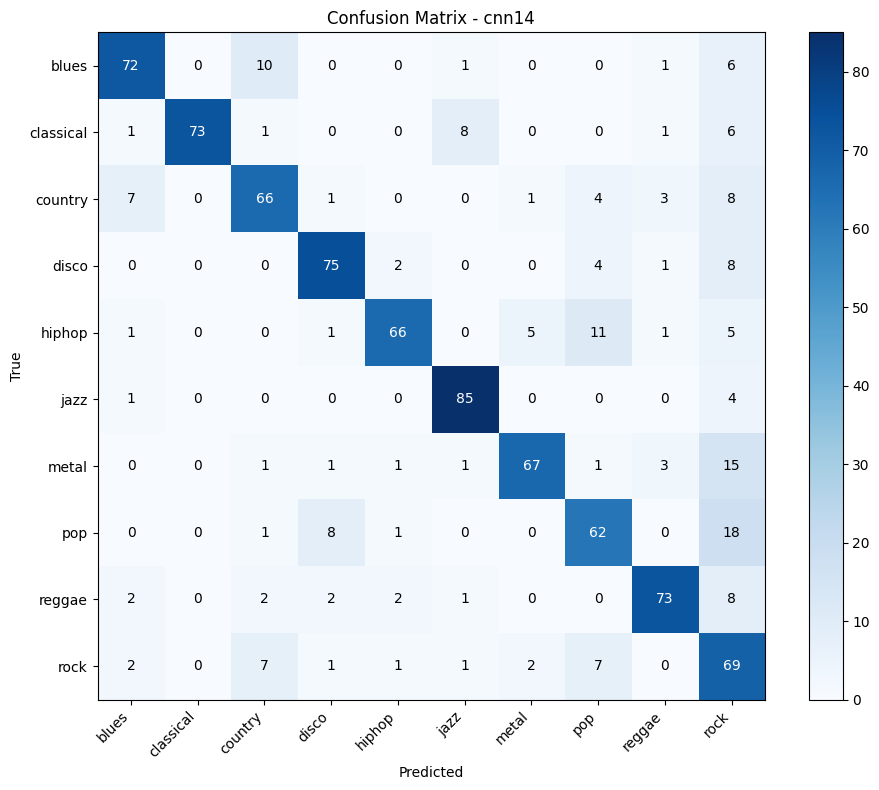


cnn14 - Most confused pairs:
  pop → rock: 18
  metal → rock: 15
  hiphop → pop: 11
  blues → country: 10
  classical → jazz: 8

🏋️ Training EFFICIENT


Epoch 1/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 1: Loss=2.1403, Val F1=0.1728
  → Saved best model (F1=0.1728)


Epoch 2/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 2: Loss=1.9761, Val F1=0.2751
  → Saved best model (F1=0.2751)


Epoch 3/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 3: Loss=1.8362, Val F1=0.2691


Epoch 4/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 4: Loss=1.7327, Val F1=0.4483
  → Saved best model (F1=0.4483)


Epoch 5/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 5: Loss=1.6852, Val F1=0.4976
  → Saved best model (F1=0.4976)


Epoch 6/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 6: Loss=1.7010, Val F1=0.4646


Epoch 7/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 7: Loss=1.5874, Val F1=0.2777


Epoch 8/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 8: Loss=1.5034, Val F1=0.2710


Epoch 9/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 9: Loss=1.4564, Val F1=0.5321
  → Saved best model (F1=0.5321)


Epoch 10/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

  Epoch 10: Loss=1.4423, Val F1=0.4032


Epoch 11/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 11: Loss=1.3657, Val F1=0.4920


Epoch 12/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 12: Loss=1.3189, Val F1=0.6590
  → Saved best model (F1=0.6590)


Epoch 13/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 13: Loss=1.3101, Val F1=0.6731
  → Saved best model (F1=0.6731)


Epoch 14/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 14: Loss=1.2938, Val F1=0.6820
  → Saved best model (F1=0.6820)


Epoch 15/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 15: Loss=1.2337, Val F1=0.6910
  → Saved best model (F1=0.6910)


Epoch 16/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 16: Loss=1.3569, Val F1=0.6209


Epoch 17/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 17: Loss=1.3651, Val F1=0.5721


Epoch 18/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 18: Loss=1.3191, Val F1=0.5113


Epoch 19/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 19: Loss=1.2647, Val F1=0.6390


Epoch 20/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 20: Loss=1.2695, Val F1=0.6067


Epoch 21/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 21: Loss=1.2262, Val F1=0.3978


Epoch 22/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

  Epoch 22: Loss=1.2336, Val F1=0.5859


Epoch 23/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 23: Loss=1.1326, Val F1=0.5874


Epoch 24/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 24: Loss=1.1478, Val F1=0.5961


Epoch 25/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 25: Loss=1.0702, Val F1=0.7222
  → Saved best model (F1=0.7222)


Epoch 26/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 26: Loss=1.0230, Val F1=0.7266
  → Saved best model (F1=0.7266)


Epoch 27/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 27: Loss=1.0604, Val F1=0.6895


Epoch 28/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 28: Loss=1.0400, Val F1=0.7517
  → Saved best model (F1=0.7517)


Epoch 29/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 29: Loss=1.0171, Val F1=0.7475


Epoch 30/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 30: Loss=1.0187, Val F1=0.7878
  → Saved best model (F1=0.7878)
  ✅ Best F1 for efficient: 0.7878


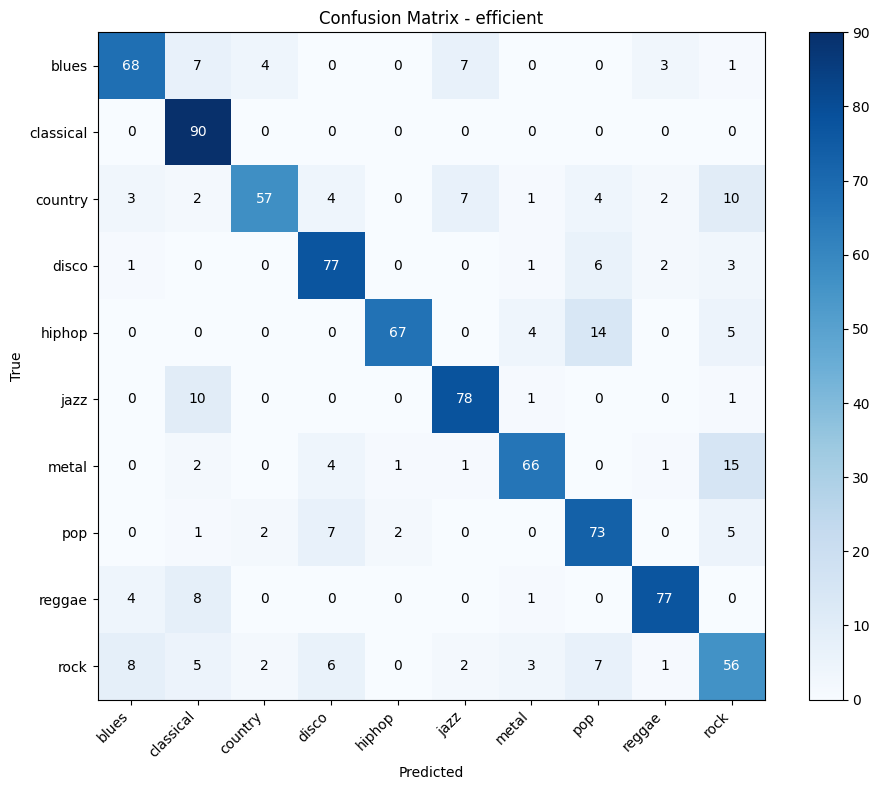


efficient - Most confused pairs:
  metal → rock: 15
  hiphop → pop: 14
  country → rock: 10
  jazz → classical: 10
  reggae → classical: 8

🏋️ Training RESNET


Epoch 1/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 1: Loss=2.0690, Val F1=0.1720
  → Saved best model (F1=0.1720)


Epoch 2/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 2: Loss=1.8172, Val F1=0.4442
  → Saved best model (F1=0.4442)


Epoch 3/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 3: Loss=1.6321, Val F1=0.4122


Epoch 4/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 4: Loss=1.5543, Val F1=0.5171
  → Saved best model (F1=0.5171)


Epoch 5/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 5: Loss=1.3724, Val F1=0.6132
  → Saved best model (F1=0.6132)


Epoch 6/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 6: Loss=1.5284, Val F1=0.4937


Epoch 7/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 7: Loss=1.4501, Val F1=0.5382


Epoch 8/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 8: Loss=1.3983, Val F1=0.4056


Epoch 9/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 9: Loss=1.3337, Val F1=0.5983


Epoch 10/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
 Exception ignored in:   <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660> 
 Traceback (most recent call last):
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
 ^^    self._shutdown_workers()
^  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
^    if w.is_alive():^
^^  ^^   ^^ ^ 
^^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    ^assert self._parent_pid == os.getpid(), 'can only test a child process'^
^ ^^^  ^ ^ ^
   File "/usr/lib/

  Epoch 10: Loss=1.2471, Val F1=0.5737


Epoch 11/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 11: Loss=1.2108, Val F1=0.6155
  → Saved best model (F1=0.6155)


Epoch 12/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 12: Loss=1.0915, Val F1=0.6771
  → Saved best model (F1=0.6771)


Epoch 13/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 13: Loss=1.0839, Val F1=0.6604


Epoch 14/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 14: Loss=0.9576, Val F1=0.7066
  → Saved best model (F1=0.7066)


Epoch 15/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 15: Loss=1.0415, Val F1=0.7009


Epoch 16/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 16: Loss=1.1798, Val F1=0.4648


Epoch 17/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 17: Loss=1.1522, Val F1=0.6509


Epoch 18/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 18: Loss=1.1234, Val F1=0.6010


Epoch 19/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 19: Loss=1.0841, Val F1=0.5667


Epoch 20/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 20: Loss=1.0739, Val F1=0.5668


Epoch 21/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 21: Loss=1.0188, Val F1=0.5848


Epoch 22/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

  Epoch 22: Loss=0.9446, Val F1=0.6296


Epoch 23/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 23: Loss=1.0019, Val F1=0.6770


Epoch 24/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 24: Loss=0.9902, Val F1=0.5722
  → Early stopping at epoch 24
  ✅ Best F1 for resnet: 0.7066


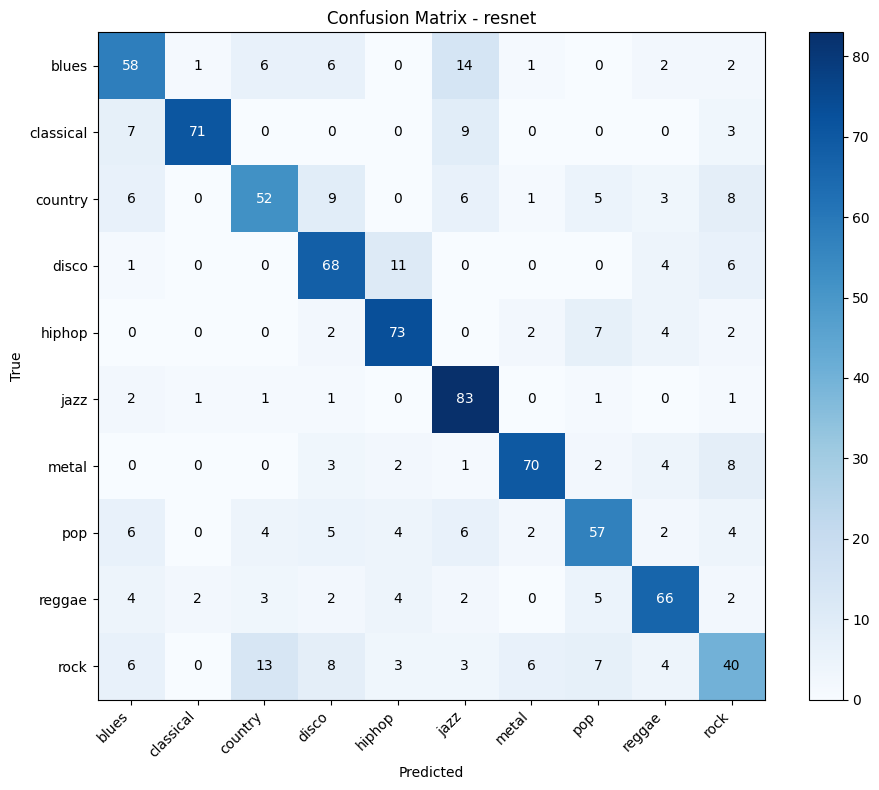


resnet - Most confused pairs:
  blues → jazz: 14
  rock → country: 13
  disco → hiphop: 11
  classical → jazz: 9
  country → disco: 9

🏋️ Training DENSENET


Epoch 1/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 1: Loss=1.9826, Val F1=0.3955
  → Saved best model (F1=0.3955)


Epoch 2/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 2: Loss=1.7571, Val F1=0.4207
  → Saved best model (F1=0.4207)


Epoch 3/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 3: Loss=1.6649, Val F1=0.3371


Epoch 4/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 4: Loss=1.5590, Val F1=0.4266
  → Saved best model (F1=0.4266)


Epoch 5/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 5: Loss=1.5160, Val F1=0.6532
  → Saved best model (F1=0.6532)


Epoch 6/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    Exception ignored in: self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
<function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>    
if w.is_alive():Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__

     self._shutdown_workers() 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
      if w.is_alive(): 
 ^ ^ ^^ ^ ^^  ^ ^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    ^assert self._parent_pid == os.getpid(), 'can only test a child process'
^^  ^ 
  File "/usr/lib/pyt

  Epoch 6: Loss=1.5809, Val F1=0.4501


Epoch 7/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 7: Loss=1.4937, Val F1=0.1821


Epoch 8/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 8: Loss=1.4449, Val F1=0.5007


Epoch 9/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 9: Loss=1.3940, Val F1=0.4781


Epoch 10/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 10: Loss=1.3588, Val F1=0.4498


Epoch 11/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 11: Loss=1.3262, Val F1=0.5025


Epoch 12/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 12: Loss=1.2661, Val F1=0.6296


Epoch 13/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 13: Loss=1.2038, Val F1=0.6890
  → Saved best model (F1=0.6890)


Epoch 14/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 14: Loss=1.1831, Val F1=0.7280
  → Saved best model (F1=0.7280)


Epoch 15/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 15: Loss=1.1692, Val F1=0.7391
  → Saved best model (F1=0.7391)


Epoch 16/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 16: Loss=1.3415, Val F1=0.3521


Epoch 17/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 17: Loss=1.3054, Val F1=0.3885


Epoch 18/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 18: Loss=1.2853, Val F1=0.5423


Epoch 19/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 19: Loss=1.2554, Val F1=0.1899


Epoch 20/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 20: Loss=1.2354, Val F1=0.4915


Epoch 21/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 21: Loss=1.2053, Val F1=0.5713


Epoch 22/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 22: Loss=1.1704, Val F1=0.6065


Epoch 23/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 23: Loss=1.1685, Val F1=0.5064


Epoch 24/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 24: Loss=1.0768, Val F1=0.6331


Epoch 25/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 25: Loss=1.0997, Val F1=0.7117
  → Early stopping at epoch 25
  ✅ Best F1 for densenet: 0.7391


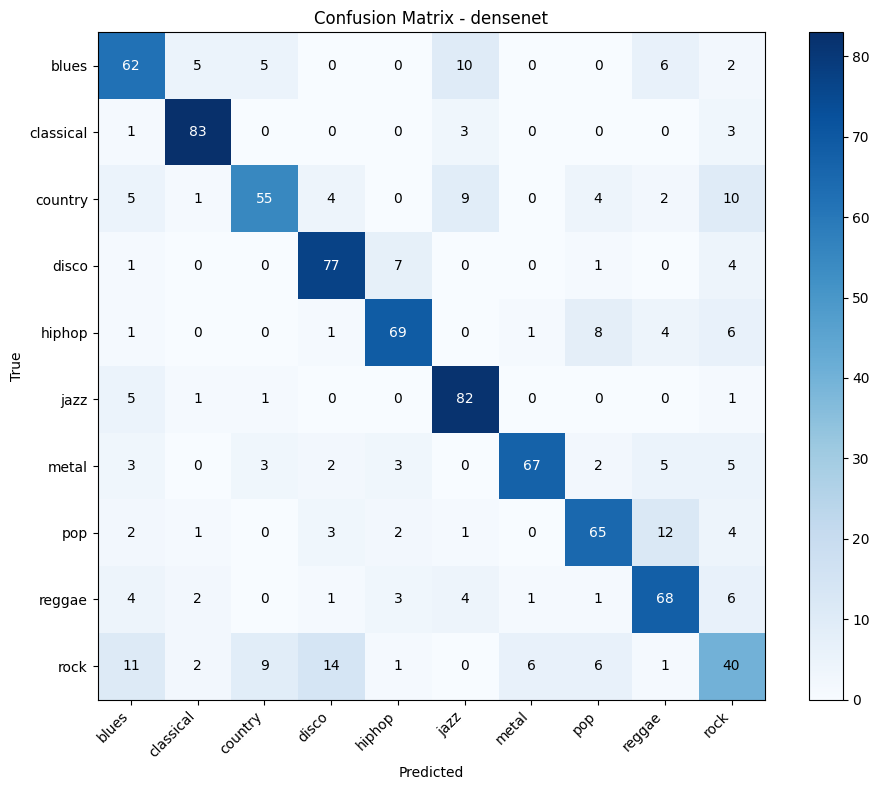


densenet - Most confused pairs:
  rock → disco: 14
  pop → reggae: 12
  rock → blues: 11
  blues → jazz: 10
  country → rock: 10

🏋️ Training ATTENTION


Epoch 1/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 1: Loss=2.0863, Val F1=0.3040
  → Saved best model (F1=0.3040)


Epoch 2/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 2: Loss=1.7964, Val F1=0.4442
  → Saved best model (F1=0.4442)


Epoch 3/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 3: Loss=1.6648, Val F1=0.5403
  → Saved best model (F1=0.5403)


Epoch 4/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 4: Loss=1.5453, Val F1=0.5838
  → Saved best model (F1=0.5838)


Epoch 5/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 5: Loss=1.4260, Val F1=0.6381
  → Saved best model (F1=0.6381)


Epoch 6/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 6: Loss=1.5008, Val F1=0.6454
  → Saved best model (F1=0.6454)


Epoch 7/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 7: Loss=1.4231, Val F1=0.4488


Epoch 8/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 8: Loss=1.3205, Val F1=0.6304


Epoch 9/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 9: Loss=1.3055, Val F1=0.7069
  → Saved best model (F1=0.7069)


Epoch 10/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 10: Loss=1.1212, Val F1=0.7480
  → Saved best model (F1=0.7480)


Epoch 11/30:   0%|          | 0/160 [00:00<?, ?it/s]

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


  Epoch 11: Loss=1.0491, Val F1=0.7646
  → Saved best model (F1=0.7646)


Epoch 12/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 12: Loss=1.0471, Val F1=0.7530


Epoch 13/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 13: Loss=1.0445, Val F1=0.7827
  → Saved best model (F1=0.7827)


Epoch 14/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 14: Loss=0.9653, Val F1=0.7892
  → Saved best model (F1=0.7892)


Epoch 15/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 15: Loss=0.9920, Val F1=0.7828


Epoch 16/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 16: Loss=1.0118, Val F1=0.6695


Epoch 17/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 17: Loss=1.0767, Val F1=0.6024


Epoch 18/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 18: Loss=1.0408, Val F1=0.7074


Epoch 19/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 19: Loss=1.0292, Val F1=0.7479


Epoch 20/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 20: Loss=1.0104, Val F1=0.7561


Epoch 21/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 21: Loss=1.0039, Val F1=0.7001


Epoch 22/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 22: Loss=1.0079, Val F1=0.7104


Epoch 23/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    Exception ignored in: self._shutdown_workers()<function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>

  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
Traceback (most recent call last):
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
if w.is_alive():    
 self._shutdown_workers() 
   File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive(): 
      ^  ^^^  ^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^    
assert self._parent_pid == os.getpid(), 'can only test a child process'  File "/usr/lib/python3

  Epoch 23: Loss=0.9101, Val F1=0.6739


Epoch 24/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 24: Loss=0.9100, Val F1=0.7284
  → Early stopping at epoch 24
  ✅ Best F1 for attention: 0.7892


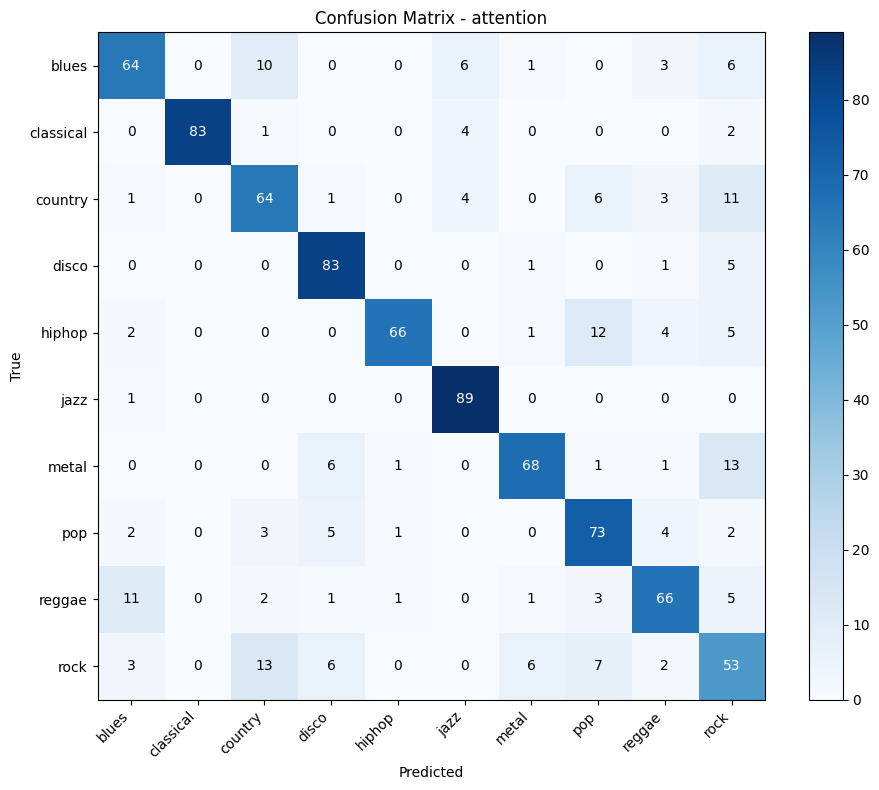


attention - Most confused pairs:
  metal → rock: 13
  rock → country: 13
  hiphop → pop: 12
  country → rock: 11
  reggae → blues: 11

🏋️ Training AST


Epoch 1/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 1: Loss=2.3976, Val F1=0.0182
  → Saved best model (F1=0.0182)


Epoch 2/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 2: Loss=2.3334, Val F1=0.0182


Epoch 3/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 3: Loss=2.3241, Val F1=0.0182


Epoch 4/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 4: Loss=2.3173, Val F1=0.0406
  → Saved best model (F1=0.0406)


Epoch 5/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 5: Loss=2.2725, Val F1=0.0783
  → Saved best model (F1=0.0783)


Epoch 6/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 6: Loss=2.3087, Val F1=0.1213
  → Saved best model (F1=0.1213)


Epoch 7/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 7: Loss=2.3136, Val F1=0.0182


Epoch 8/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 8: Loss=2.3247, Val F1=0.0182


Epoch 9/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 9: Loss=2.3166, Val F1=0.0182


Epoch 10/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

  Epoch 10: Loss=2.3025, Val F1=0.0821


Epoch 11/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 11: Loss=2.2475, Val F1=0.1549
  → Saved best model (F1=0.1549)


Epoch 12/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 12: Loss=2.1710, Val F1=0.1728
  → Saved best model (F1=0.1728)


Epoch 13/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 13: Loss=2.1370, Val F1=0.1957
  → Saved best model (F1=0.1957)


Epoch 14/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 14: Loss=2.1045, Val F1=0.1860


Epoch 15/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 15: Loss=2.0778, Val F1=0.1958
  → Saved best model (F1=0.1958)


Epoch 16/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 16: Loss=2.1774, Val F1=0.1419


Epoch 17/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 17: Loss=2.1406, Val F1=0.2020
  → Saved best model (F1=0.2020)


Epoch 18/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 18: Loss=2.0989, Val F1=0.2172
  → Saved best model (F1=0.2172)


Epoch 19/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 19: Loss=2.0726, Val F1=0.2933
  → Saved best model (F1=0.2933)


Epoch 20/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 20: Loss=2.0457, Val F1=0.3162
  → Saved best model (F1=0.3162)


Epoch 21/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 21: Loss=1.9871, Val F1=0.2641


Epoch 22/30:   0%|          | 0/160 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
    if w.is_alive():
       ^^^^^^^^^^^^
  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 16

  Epoch 22: Loss=1.9418, Val F1=0.3513
  → Saved best model (F1=0.3513)


Epoch 23/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 23: Loss=1.9060, Val F1=0.3534
  → Saved best model (F1=0.3534)


Epoch 24/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 24: Loss=1.8356, Val F1=0.4023
  → Saved best model (F1=0.4023)


Epoch 25/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 25: Loss=1.7946, Val F1=0.3205


Epoch 26/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 26: Loss=1.7403, Val F1=0.4333
  → Saved best model (F1=0.4333)


Epoch 27/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 27: Loss=1.6753, Val F1=0.4077


Epoch 28/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 28: Loss=1.6384, Val F1=0.4156


Epoch 29/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 29: Loss=1.5794, Val F1=0.4566
  → Saved best model (F1=0.4566)


Epoch 30/30:   0%|          | 0/160 [00:00<?, ?it/s]

  Epoch 30: Loss=1.5363, Val F1=0.4649
  → Saved best model (F1=0.4649)
  ✅ Best F1 for ast: 0.4649


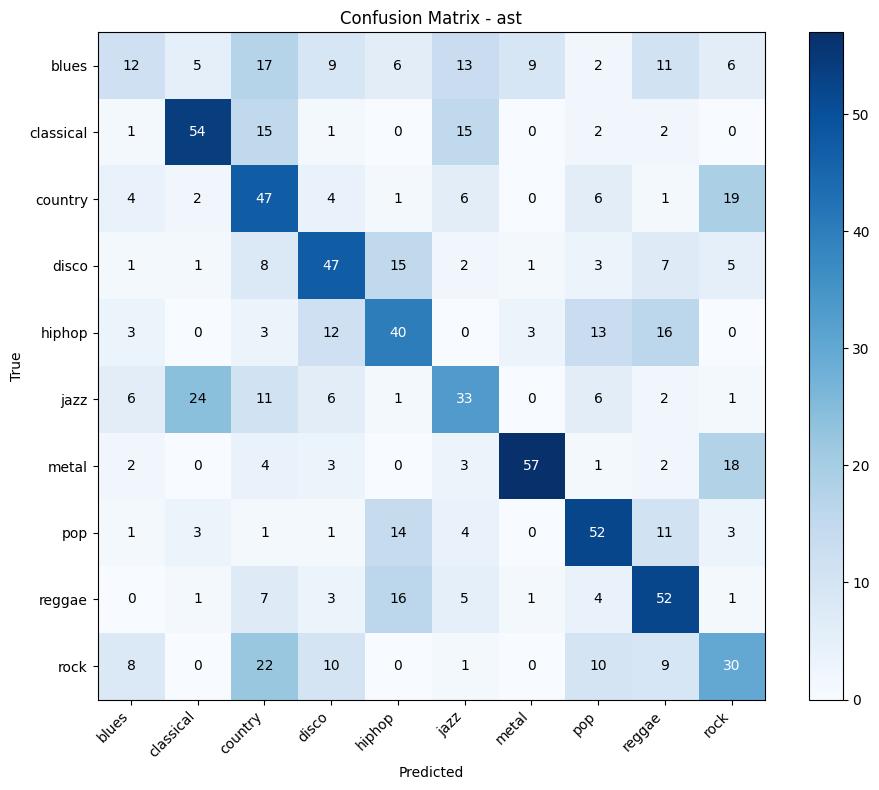


ast - Most confused pairs:
  jazz → classical: 24
  rock → country: 22
  country → rock: 19
  metal → rock: 18
  blues → country: 17
⏱️ [Training Spectrogram Models] 253.9 min

🏋️ Training SPEAKER CLASSIFIER
   Train: (850, 192), Val: (150, 192)
  Epoch 5: Val F1=0.8331
  Epoch 10: Val F1=0.8592
  Epoch 15: Val F1=0.8605
  Epoch 20: Val F1=0.8727
  Epoch 25: Val F1=0.8859
  Epoch 30: Val F1=0.8799
  ✅ Best F1 for speaker: 0.8859

🏋️ Training CLAP CLASSIFIER
   Train: (850, 512), Val: (150, 512)
  Epoch 5: Val F1=0.8804
  Epoch 10: Val F1=0.8692
  Epoch 15: Val F1=0.8871
  Epoch 20: Val F1=0.8803
  Epoch 25: Val F1=0.8867
  → Early stopping at epoch 27
  ✅ Best F1 for clap: 0.8934

🏋️ Training PANNS_EMB CLASSIFIER
   Train: (850, 2048), Val: (150, 2048)
  Epoch 5: Val F1=0.0590
  Epoch 10: Val F1=0.0182
  Epoch 15: Val F1=0.0182
  Epoch 20: Val F1=0.0182
  → Early stopping at epoch 23
  ✅ Best F1 for panns_emb: 0.0857
⏱️ [Training Embedding Models] 0.1 min

📊 MODEL PERFORMANCE SUMMARY


    Epoch 1:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 1: Val F1=0.7802


    Epoch 2:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 2: Val F1=0.7716


    Epoch 3:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 3: Val F1=0.7740


    Epoch 4:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 4: Val F1=0.7749


    Epoch 5:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 5: Val F1=0.7693

  Fine-tuning attention...


    Epoch 1:   0%|          | 0/171 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>Exception ignored in: 
<function _MultiProcessingDataLoaderIter.__del__ at 0x78f80741e660>
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1664, in __del__
self._shutdown_workers()    
self._shutdown_workers()  File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers

      File "/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py", line 1647, in _shutdown_workers
if w.is_alive():    
if w.is_alive(): 
           ^ ^^ ^^^^^^^^^^^^^^^^^
^  File "/usr/lib/python3.12/multiprocessing/process.py", line 160, in is_alive
^^^    
assert self._parent_pid == os.getpid(), 'can only test a child process'
  File "/usr/lib/python

    Epoch 1: Val F1=0.7782


    Epoch 2:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 2: Val F1=0.7864


    Epoch 3:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 3: Val F1=0.7896


    Epoch 4:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 4: Val F1=0.7933


    Epoch 5:   0%|          | 0/171 [00:00<?, ?it/s]

    Epoch 5: Val F1=0.7758
⏱️ [Pseudo-labeling] 41.8 min

🎯 ENSEMBLE INFERENCE (TTA=9)
  cnn14 (TTA)...
  efficient (TTA)...
  resnet (TTA)...
  densenet (TTA)...
  attention (TTA)...
  ast (TTA)...
  speaker (embedding)...
  clap (embedding) 🎵...
  panns_emb (embedding)...

  Model weights:
    cnn14: 0.143
    efficient: 0.118
    resnet: 0.106
    densenet: 0.111
    attention: 0.118
    ast: 0.070
    speaker: 0.146
    clap: 0.174
    panns_emb: 0.014

  Confidence: mean=0.510, min=0.142, max=0.923

  Prediction distribution:
    blues: 338 (11.2%)
    classical: 286 (9.5%)
    country: 138 (4.6%)
    disco: 310 (10.3%)
    hiphop: 332 (11.0%)
    jazz: 285 (9.4%)
    metal: 275 (9.1%)
    pop: 321 (10.6%)
    reggae: 362 (12.0%)
    rock: 373 (12.4%)
⏱️ [Ensemble Inference] 15.7 min

📝 CREATING SUBMISSION

✅ Submission saved: submission.csv
   Total predictions: 3020

   Preview:
       filename      genre
0  song0001.wav        pop
1  song0002.wav  classical
2  song0003.wav     

In [7]:
# =============================================================================
# CELL 7: TRAINING + INFERENCE + SUBMISSION (9-MODEL ENSEMBLE)
# =============================================================================

import time
from contextlib import contextmanager

@contextmanager
def timer(name):
    start = time.time()
    yield
    print(f"⏱️ [{name}] {(time.time()-start)/60:.1f} min")

# =============================================================================
# LOSS FUNCTIONS
# =============================================================================

def mixup_data(x, y, alpha=0.4):
    if alpha > 0:
        lam = np.random.beta(alpha, alpha)
    else:
        lam = 1
    idx = torch.randperm(x.size(0)).to(x.device)
    mixed_x = lam * x + (1 - lam) * x[idx]
    return mixed_x, y, y[idx], lam

def mixup_criterion(criterion, pred, y_a, y_b, lam):
    return lam * criterion(pred, y_a) + (1 - lam) * criterion(pred, y_b)

class LabelSmoothingLoss(nn.Module):
    def __init__(self, smoothing=0.1):
        super().__init__()
        self.smoothing = smoothing
    
    def forward(self, pred, target):
        confidence = 1 - self.smoothing
        logprobs = F.log_softmax(pred, dim=-1)
        nll = -logprobs.gather(dim=-1, index=target.unsqueeze(1)).squeeze(1)
        smooth = -logprobs.mean(dim=-1)
        return (confidence * nll + self.smoothing * smooth).mean()

# =============================================================================
# MODEL CREATION
# =============================================================================

def create_models():
    """Create all 9 ensemble models."""
    models = {}
    
    print("\n📦 Creating models...")
    
    # ===== 6 SPECTROGRAM MODELS =====
    
    models['cnn14'] = CNN14(
        num_classes=CONFIG['num_classes'],
        pretrained_path=CONFIG['weights_path']
    ).to(device)
    print("  ✅ CNN14 (PANNs pretrained)")
    
    models['efficient'] = EfficientCNN(CONFIG['num_classes']).to(device)
    print("  ✅ EfficientCNN (SE blocks)")
    
    models['resnet'] = ResNetAudio(CONFIG['num_classes']).to(device)
    print("  ✅ ResNetAudio")
    
    models['densenet'] = DenseNetAudio(CONFIG['num_classes']).to(device)
    print("  ✅ DenseNetAudio")
    
    models['attention'] = AttentionCNN(CONFIG['num_classes']).to(device)
    print("  ✅ AttentionCNN (CBAM)")
    
    spec_h = CONFIG['n_mels']
    spec_w = int(CONFIG['sr'] * CONFIG['duration'] / CONFIG['hop_length']) + 1
    models['ast'] = AST(
        num_classes=CONFIG['num_classes'],
        img_size=(spec_h, spec_w),
        patch_size=(16, 16),
        embed_dim=384, depth=6, num_heads=6
    ).to(device)
    print("  ✅ AST (Transformer)")
    
    # ===== 3 EMBEDDING MODELS =====
    
    if train_nemo_emb is not None:
        models['speaker'] = EmbeddingClassifier(CONFIG['num_classes'], CONFIG['nemo_dim']).to(device)
        print("  ✅ Speaker Embedding Classifier (NeMo/SpeechBrain)")
    
    if train_clap_emb_split is not None:
        models['clap'] = EmbeddingClassifier(CONFIG['num_classes'], CONFIG['clap_dim']).to(device)
        print("  ✅ CLAP Embedding Classifier (music-trained!) 🎵")
    
    if train_panns_emb_split is not None:
        models['panns_emb'] = EmbeddingClassifier(CONFIG['num_classes'], CONFIG['panns_dim']).to(device)
        
        print("  ✅ PANNs Embedding Classifier (AudioSet)")
    
    total_params = sum(sum(p.numel() for p in m.parameters()) for m in models.values())
    print(f"\n📊 Total models: {len(models)}")
    print(f"📊 Total parameters: {total_params:,}")
    
    return models

# =============================================================================
# TRAINING FUNCTION (SPECTROGRAM MODELS)
# =============================================================================

def train_model(model, name, train_loader, val_loader, epochs=30, patience=10):
    print(f"\n{'='*50}")
    print(f"🏋️ Training {name.upper()}")
    print(f"{'='*50}")
    
    optimizer = torch.optim.AdamW(
        model.parameters(), 
        lr=CONFIG['learning_rate'],
        weight_decay=CONFIG['weight_decay']
    )
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, T_0=5, T_mult=2)
    criterion = LabelSmoothingLoss(CONFIG['label_smoothing'])
    scaler = GradScaler()
    
    best_f1 = 0
    patience_count = 0
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0
        
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
        for data, target in pbar:
            data, target = data.to(device), target.to(device)
            
            optimizer.zero_grad()
            
            if random.random() < 0.5:
                data, y_a, y_b, lam = mixup_data(data, target, CONFIG['mixup_alpha'])
                with autocast():
                    output = model(data)
                    loss = mixup_criterion(criterion, output, y_a, y_b, lam)
            else:
                with autocast():
                    output = model(data)
                    loss = criterion(output, target)
            
            scaler.scale(loss).backward()
            scaler.unscale_(optimizer)
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            scaler.step(optimizer)
            scaler.update()
            
            train_loss += loss.item()
            pbar.set_postfix({'loss': f'{loss.item():.4f}'})
        
        scheduler.step()
        
        # Validation
        model.eval()
        all_preds, all_targets = [], []
        
        with torch.no_grad():
            for data, target in val_loader:
                data = data.to(device)
                with autocast():
                    output = model(data)
                preds = output.argmax(dim=1).cpu().numpy()
                all_preds.extend(preds)
                all_targets.extend(target.numpy())
        
        val_f1 = f1_score(all_targets, all_preds, average='macro')
        
        print(f"  Epoch {epoch+1}: Loss={train_loss/len(train_loader):.4f}, Val F1={val_f1:.4f}")
        
        if val_f1 > best_f1:
            best_f1 = val_f1
            patience_count = 0
            torch.save(model.state_dict(), f'{name}_best.pth')
            print(f"  → Saved best model (F1={val_f1:.4f})")
        else:
            patience_count += 1
            if patience_count >= patience:
                print(f"  → Early stopping at epoch {epoch+1}")
                break
    
    model.load_state_dict(torch.load(f'{name}_best.pth', weights_only=False))
    print(f"  ✅ Best F1 for {name}: {best_f1:.4f}")
    
    return model, best_f1

# =============================================================================
# EMBEDDING CLASSIFIER TRAINING
# =============================================================================

def train_embedding_classifier(model, name, train_emb, train_labels, val_emb, val_labels, epochs=30):
    """Train embedding-based classifier."""
    print(f"\n{'='*50}")
    print(f"🏋️ Training {name.upper()} CLASSIFIER")
    print(f"{'='*50}")
    print(f"   Train: {train_emb.shape}, Val: {val_emb.shape}")
    
    class EmbeddingDataset(Dataset):
        def __init__(self, emb, labels):
            self.emb = torch.FloatTensor(emb)
            self.labels = torch.LongTensor(labels)
        def __len__(self):
            return len(self.labels)
        def __getitem__(self, idx):
            return self.emb[idx], self.labels[idx]
    
    train_ds = EmbeddingDataset(train_emb, train_labels)
    val_ds = EmbeddingDataset(val_emb, val_labels)
    
    train_dl = DataLoader(train_ds, batch_size=64, shuffle=True)
    val_dl = DataLoader(val_ds, batch_size=64, shuffle=False)
    
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=epochs)
    criterion = LabelSmoothingLoss(0.1)
    
    best_f1 = 0
    patience_count = 0
    patience = 10
    
    for epoch in range(epochs):
        model.train()
        for emb, target in train_dl:
            emb, target = emb.to(device), target.to(device)
            optimizer.zero_grad()
            output = model(emb)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
        
        scheduler.step()
        
        # Validation
        model.eval()
        all_preds, all_targets = [], []
        with torch.no_grad():
            for emb, target in val_dl:
                emb = emb.to(device)
                output = model(emb)
                all_preds.extend(output.argmax(1).cpu().numpy())
                all_targets.extend(target.numpy())
        
        val_f1 = f1_score(all_targets, all_preds, average='macro')
        
        if val_f1 > best_f1:
            best_f1 = val_f1
            patience_count = 0
            torch.save(model.state_dict(), f'{name}_best.pth')
        else:
            patience_count += 1
            if patience_count >= patience:
                print(f"  → Early stopping at epoch {epoch+1}")
                break
        
        if (epoch + 1) % 5 == 0:
            print(f"  Epoch {epoch+1}: Val F1={val_f1:.4f}")
    
    model.load_state_dict(torch.load(f'{name}_best.pth', weights_only=False))
    print(f"  ✅ Best F1 for {name}: {best_f1:.4f}")
    
    return model, best_f1

# =============================================================================
# CONFUSION MATRIX ANALYSIS
# =============================================================================

def analyze_model(model, val_loader, name):
    """Analyze model with confusion matrix."""
    model.eval()
    all_preds, all_targets = [], []
    
    with torch.no_grad():
        for data, target in val_loader:
            data = data.to(device)
            output = model(data)
            all_preds.extend(output.argmax(1).cpu().numpy())
            all_targets.extend(target.numpy())
    
    cm = confusion_matrix(all_targets, all_preds)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    plt.xticks(range(10), GENRES, rotation=45, ha='right')
    plt.yticks(range(10), GENRES)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'Confusion Matrix - {name}')
    
    for i in range(10):
        for j in range(10):
            plt.text(j, i, cm[i,j], ha='center', va='center',
                    color='white' if cm[i,j] > cm.max()/2 else 'black')
    
    plt.tight_layout()
    plt.savefig(f'cm_{name}.png', dpi=150)
    plt.show()
    
    print(f"\n{name} - Most confused pairs:")
    confused = []
    for i in range(10):
        for j in range(10):
            if i != j and cm[i,j] > 0:
                confused.append((GENRES[i], GENRES[j], cm[i,j]))
    confused.sort(key=lambda x: x[2], reverse=True)
    for true, pred, count in confused[:5]:
        print(f"  {true} → {pred}: {count}")

# =============================================================================
# TTA INFERENCE (SPECTROGRAM MODELS)
# =============================================================================

def tta_inference(model, test_loader, n_passes=9):
    """Test-time augmentation."""
    model.eval()
    
    all_probs = []
    
    for tta_pass in range(n_passes):
        pass_probs = []
        
        for data, _ in test_loader:
            data = data.to(device)
            
            if tta_pass > 0:
                aug_type = tta_pass % 5
                if aug_type == 1:
                    data = torch.roll(data, shifts=-random.randint(20, 80), dims=3)
                elif aug_type == 2:
                    data = torch.roll(data, shifts=random.randint(20, 80), dims=3)
                elif aug_type == 3:
                    f = random.randint(5, 15)
                    f0 = random.randint(0, data.shape[2] - f)
                    data = data.clone()
                    data[:, :, f0:f0+f, :] = 0
                elif aug_type == 4:
                    data = data + torch.randn_like(data) * 0.02
            
            with torch.no_grad():
                with autocast():
                    output = model(data)
                probs = F.softmax(output, dim=1).cpu().numpy()
            
            pass_probs.append(probs)
        
        all_probs.append(np.vstack(pass_probs))
    
    return np.mean(all_probs, axis=0)

# =============================================================================
# EMBEDDING MODEL INFERENCE
# =============================================================================

def embedding_inference(model, embeddings):
    """Inference for embedding-based models."""
    model.eval()
    with torch.no_grad():
        emb_tensor = torch.FloatTensor(embeddings).to(device)
        output = model(emb_tensor)
        probs = F.softmax(output, dim=1).cpu().numpy()
    return probs

# =============================================================================
# PSEUDO-LABELING
# =============================================================================

def pseudo_labeling(models, model_perfs, train_loader, val_loader, test_loader, 
                    test_specs, threshold=0.80, fine_tune_epochs=5):
    """Pseudo-labeling with ensemble predictions."""
    print(f"\n{'='*50}")
    print(f"🏷️ PSEUDO-LABELING (threshold={threshold})")
    print(f"{'='*50}")
    
    # Get ensemble predictions (spectrogram models only for pseudo-labeling)
    print("  Getting ensemble predictions...")
    ensemble_probs = []
    weights = []
    
    spec_models = ['cnn14', 'efficient', 'resnet', 'densenet', 'attention', 'ast']
    
    for name in spec_models:
        if name in models:
            print(f"    {name}...")
            probs = tta_inference(models[name], test_loader, n_passes=3)
            ensemble_probs.append(probs)
            weights.append(model_perfs.get(name, 0.5))
    
    if not ensemble_probs:
        print("  No spectrogram models available for pseudo-labeling")
        return models
    
    weights = np.array(weights) / sum(weights)
    avg_probs = sum(p * w for p, w in zip(ensemble_probs, weights))
    
    max_probs = avg_probs.max(axis=1)
    mask = max_probs >= threshold
    pseudo_labels = avg_probs.argmax(axis=1)
    
    n_pseudo = mask.sum()
    print(f"  Selected {n_pseudo}/{len(test_specs)} pseudo-labels ({n_pseudo/len(test_specs):.1%})")
    
    if n_pseudo < 100:
        print("  Too few pseudo-labels, skipping fine-tuning")
        return models
    
    print("  Pseudo-label distribution:")
    for i, g in enumerate(GENRES):
        count = ((pseudo_labels == i) & mask).sum()
        print(f"    {g}: {count}")
    
    pseudo_specs = [test_specs[i] for i in range(len(test_specs)) if mask[i]]
    pseudo_labels_list = [pseudo_labels[i] for i in range(len(test_specs)) if mask[i]]
    
    pseudo_dataset = SpectrogramDataset(pseudo_specs, pseudo_labels_list, augment=True)
    combined_dataset = ConcatDataset([train_loader.dataset, pseudo_dataset])
    combined_loader = DataLoader(combined_dataset, batch_size=CONFIG['batch_size'], 
                                  shuffle=True, num_workers=2, pin_memory=True)
    
    print(f"  Combined training set: {len(combined_dataset)} samples")
    
    # Fine-tune top 2 spectrogram models
    spec_perfs = {k: v for k, v in model_perfs.items() if k in spec_models}
    top_models = sorted(spec_perfs.items(), key=lambda x: x[1], reverse=True)[:2]
    
    for name, _ in top_models:
        print(f"\n  Fine-tuning {name}...")
        model = models[name]
        
        optimizer = torch.optim.AdamW(model.parameters(), lr=CONFIG['learning_rate'] * 0.1)
        criterion = LabelSmoothingLoss(CONFIG['label_smoothing'])
        scaler = GradScaler()
        
        for epoch in range(fine_tune_epochs):
            model.train()
            for data, target in tqdm(combined_loader, desc=f"    Epoch {epoch+1}", leave=False):
                data, target = data.to(device), target.to(device)
                optimizer.zero_grad()
                with autocast():
                    output = model(data)
                    loss = criterion(output, target)
                scaler.scale(loss).backward()
                scaler.step(optimizer)
                scaler.update()
            
            model.eval()
            preds, targets = [], []
            with torch.no_grad():
                for data, target in val_loader:
                    data = data.to(device)
                    output = model(data)
                    preds.extend(output.argmax(1).cpu().numpy())
                    targets.extend(target.numpy())
            f1 = f1_score(targets, preds, average='macro')
            print(f"    Epoch {epoch+1}: Val F1={f1:.4f}")
        
        torch.save(model.state_dict(), f'{name}_finetuned.pth')
        models[name] = model
    
    return models

# =============================================================================
# ENSEMBLE INFERENCE (ALL 9 MODELS)
# =============================================================================

def ensemble_inference(models, model_perfs, test_loader, 
                       test_nemo_emb=None, test_clap_emb=None, test_panns_emb=None,
                       n_tta=9):
    """Final ensemble inference with all models."""
    print(f"\n{'='*50}")
    print(f"🎯 ENSEMBLE INFERENCE (TTA={n_tta})")
    print(f"{'='*50}")
    
    all_probs = []
    weights = []
    model_names = []
    
    # Spectrogram models
    spec_models = ['cnn14', 'efficient', 'resnet', 'densenet', 'attention', 'ast']
    
    for name in spec_models:
        if name in models:
            print(f"  {name} (TTA)...")
            probs = tta_inference(models[name], test_loader, n_passes=n_tta)
            all_probs.append(probs)
            
            w = model_perfs.get(name, 0.5)
            if name == 'cnn14':
                w *= 1.2  # Boost pretrained model
            weights.append(w)
            model_names.append(name)
    
    # Embedding models
    if 'speaker' in models and test_nemo_emb is not None:
        print(f"  speaker (embedding)...")
        probs = embedding_inference(models['speaker'], test_nemo_emb)
        all_probs.append(probs)
        weights.append(model_perfs.get('speaker', 0.5) * 1.1)
        model_names.append('speaker')
    
    if 'clap' in models and test_clap_emb is not None:
        print(f"  clap (embedding) 🎵...")
        probs = embedding_inference(models['clap'], test_clap_emb)
        all_probs.append(probs)
        # CLAP gets higher weight - it's trained on music!
        weights.append(model_perfs.get('clap', 0.5) * 1.3)
        model_names.append('clap')
    
    if 'panns_emb' in models and test_panns_emb is not None:
        print(f"  panns_emb (embedding)...")
        probs = embedding_inference(models['panns_emb'], test_panns_emb)
        all_probs.append(probs)
        weights.append(model_perfs.get('panns_emb', 0.5) * 1.1)
        model_names.append('panns_emb')
    
    # Normalize weights
    weights = np.array(weights) / sum(weights)
    
    print(f"\n  Model weights:")
    for name, w in zip(model_names, weights):
        print(f"    {name}: {w:.3f}")
    
    # Weighted average
    final_probs = sum(p * w for p, w in zip(all_probs, weights))
    final_preds = final_probs.argmax(axis=1)
    
    # Confidence stats
    confidences = final_probs.max(axis=1)
    print(f"\n  Confidence: mean={confidences.mean():.3f}, min={confidences.min():.3f}, max={confidences.max():.3f}")
    
    # Prediction distribution
    print("\n  Prediction distribution:")
    for i, g in enumerate(GENRES):
        count = (final_preds == i).sum()
        print(f"    {g}: {count} ({count/len(final_preds):.1%})")
    
    return final_preds, final_probs

# =============================================================================
# MAIN EXECUTION
# =============================================================================

print("\n" + "="*70)
print("🚀 STARTING 9-MODEL ENSEMBLE TRAINING PIPELINE")
print("="*70)

# Create models
with timer("Model Creation"):
    models = create_models()

# Train all models
model_perfs = {}

# ===== TRAIN SPECTROGRAM MODELS =====
spec_models = ['cnn14', 'efficient', 'resnet', 'densenet', 'attention', 'ast']

with timer("Training Spectrogram Models"):
    for name in spec_models:
        if name in models:
            model, f1 = train_model(
                models[name], name, train_loader, val_loader,
                epochs=CONFIG['num_epochs'], patience=CONFIG['patience']
            )
            models[name] = model
            model_perfs[name] = f1
            
            analyze_model(model, val_loader, name)
            
            torch.cuda.empty_cache()
            gc.collect()

# ===== TRAIN EMBEDDING MODELS =====
with timer("Training Embedding Models"):
    
    # Speaker (NeMo/SpeechBrain) classifier
    if 'speaker' in models and train_nemo_emb is not None:
        model, f1 = train_embedding_classifier(
            models['speaker'], 'speaker',
            train_nemo_emb, y_train_songs,
            val_nemo_emb, y_val_songs,
            epochs=CONFIG['num_epochs']
        )
        models['speaker'] = model
        model_perfs['speaker'] = f1
    
    # CLAP classifier (music-trained!)
    if 'clap' in models and train_clap_emb_split is not None:
        model, f1 = train_embedding_classifier(
            models['clap'], 'clap',
            train_clap_emb_split, y_train_songs,
            val_clap_emb_split, y_val_songs,
            epochs=CONFIG['num_epochs']
        )
        models['clap'] = model
        model_perfs['clap'] = f1
    
    # PANNs embedding classifier
    if 'panns_emb' in models and train_panns_emb_split is not None:
        model, f1 = train_embedding_classifier(
            models['panns_emb'], 'panns_emb',
            train_panns_emb_split, y_train_songs,
            val_panns_emb_split, y_val_songs,
            epochs=CONFIG['num_epochs']
        )
        models['panns_emb'] = model
        model_perfs['panns_emb'] = f1

# Print summary
print(f"\n{'='*50}")
print("📊 MODEL PERFORMANCE SUMMARY")
print(f"{'='*50}")
for name, f1 in sorted(model_perfs.items(), key=lambda x: x[1], reverse=True):
    marker = "🎵" if name == 'clap' else "  "
    print(f"  {marker} {name}: {f1:.4f}")

# Pseudo-labeling
with timer("Pseudo-labeling"):
    models = pseudo_labeling(
        models, model_perfs, train_loader, val_loader, test_loader,
        test_specs, threshold=CONFIG['pseudo_threshold'], fine_tune_epochs=5
    )

# Final ensemble inference
with timer("Ensemble Inference"):
    final_preds, final_probs = ensemble_inference(
        models, model_perfs, test_loader,
        test_nemo_embeddings, test_clap_embeddings, test_panns_embeddings,
        n_tta=CONFIG['tta_passes']
    )

# =============================================================================
# CREATE SUBMISSION
# =============================================================================

print(f"\n{'='*50}")
print("📝 CREATING SUBMISSION")
print(f"{'='*50}")

submission = pd.DataFrame({
    'filename': test_names,
    'genre': [IDX_TO_GENRE[p] for p in final_preds]
})

submission = submission.sort_values('filename').reset_index(drop=True)
submission.to_csv('submission.csv', index=False)

print(f"\n✅ Submission saved: submission.csv")
print(f"   Total predictions: {len(submission)}")
print(f"\n   Preview:")
print(submission.head(10))

print(f"\n   Genre distribution:")
print(submission['genre'].value_counts())

# =============================================================================
# SAVE ALL MODELS
# =============================================================================

print(f"\n{'='*50}")
print("💾 SAVING MODELS")
print(f"{'='*50}")

for name, model in models.items():
    torch.save({
        'state_dict': model.state_dict(),
        'performance': model_perfs.get(name, 0)
    }, f'{name}_final.pth')
    print(f"  Saved {name}_final.pth (F1={model_perfs.get(name, 0):.4f})")

# =============================================================================
# FINAL SUMMARY
# =============================================================================

print(f"\n{'='*70}")
print("✅ PIPELINE COMPLETE")
print(f"{'='*70}")

print(f"""
📊 Final Summary:
   - Total models trained: {len(models)}
   - Spectrogram models: {len([m for m in models if m in spec_models])}
   - Embedding models: {len([m for m in models if m not in spec_models])}
   
🏆 Top 3 Models:
""")
top_3 = sorted(model_perfs.items(), key=lambda x: x[1], reverse=True)[:3]
for i, (name, f1) in enumerate(top_3, 1):
    print(f"   {i}. {name}: {f1:.4f}")

print(f"""
🎯 Expected Performance:
   - Previous score: 0.93243
   - Target score: 0.97+
   - Top leaderboard: 0.97819
   
📦 Files created:
   - submission.csv
   - *_best.pth (best checkpoints)
   - *_final.pth (final models)
   - cm_*.png (confusion matrices)
   
🚀 Next steps:
   1. Submit submission.csv to Kaggle
   2. Check leaderboard score
   3. If < 0.97, analyze confusion matrices
""")

print("\n🎉 READY FOR SUBMISSION!")